In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
%matplotlib inline
from pylab import rcParams

## Problem Statement 1:

### For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

#### 1. Read the data as an appropriate Time Series data and plot the data.

In [27]:
from pylab import rcParams
rcParams['figure.figsize'] = 20,8

In [6]:
df_sparkling = pd.read_csv("Sparkling.csv",parse_dates = True, index_col = 0)

df_sparkling.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

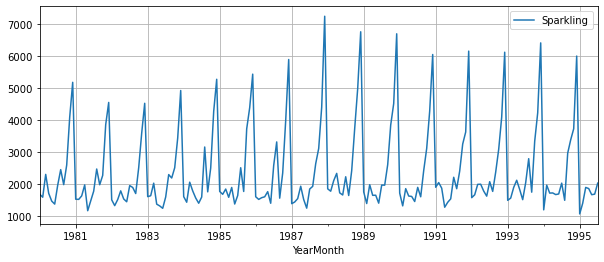

In [308]:
df_sparkling.plot(figsize=(10,4))
plt.grid();

### 2. Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [11]:
df_sparkling.describe().T

count         mean         std     min     25%     50%     75%  \
Sparkling  187.0  2402.417112  1295.11154  1070.0  1605.0  1874.0  2549.0   

              max  
Sparkling  7242.0

In [12]:
df_sparkling.isnull().values.sum()

0

In [13]:
df_sparkling.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  187 non-null    int64
dtypes: int64(1)
memory usage: 2.9 KB


In [15]:
df_sparkling.duplicated().sum()

11

#### Yearly boxplot

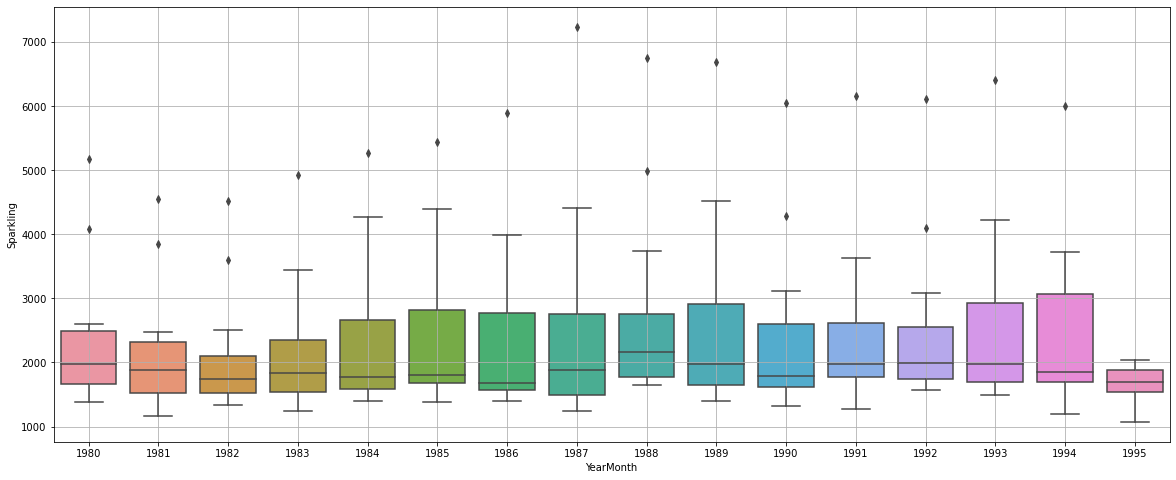

In [28]:
sns.boxplot(x = df_sparkling.index.year, y = df_sparkling['Sparkling'])
plt.grid();

#### Monthly boxplot

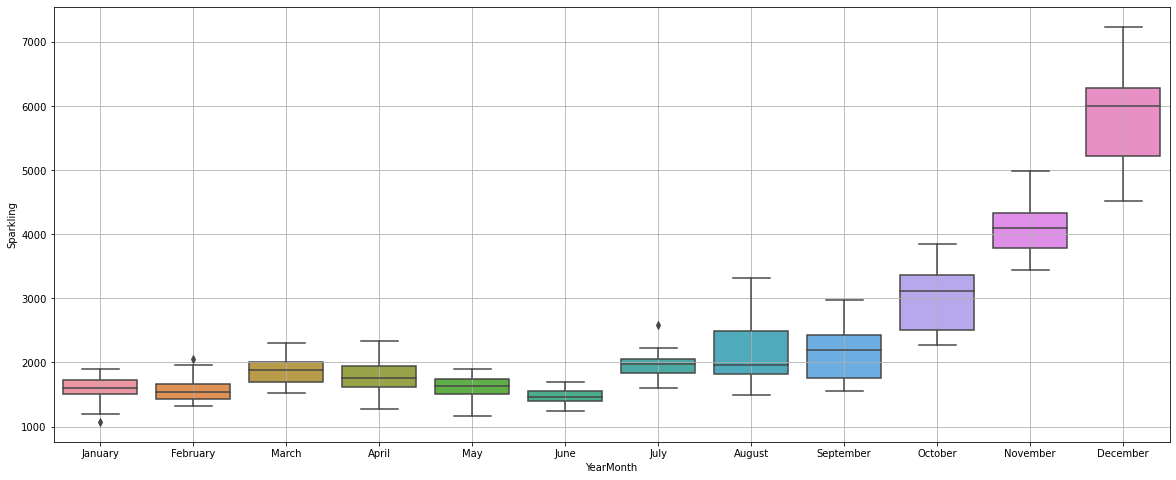

In [30]:
sns.boxplot(x = df_sparkling.index.month_name(),y = df_sparkling['Sparkling'])
plt.grid();

sns.boxplot(x = df_rose.index.month_name(),y = df_rose['Rose'])
plt.grid();

#### Plot a time series monthplot to understand the spread of accidents across different years and within different months across years

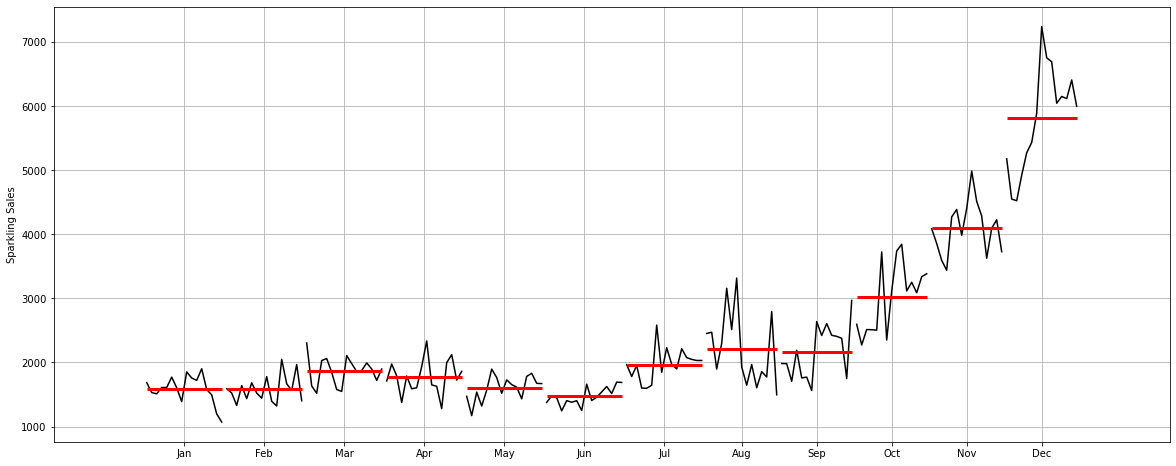

In [31]:
from statsmodels.graphics.tsaplots import month_plot

month_plot(df_sparkling['Sparkling'],ylabel='Sparkling Sales')
plt.grid();

#### Plot a graph of monthly SparklingSales across years.


In [32]:
monthly_sales_across_years = pd.pivot_table(df_sparkling, values = 'Sparkling', columns = df_sparkling.index.month, index = df_sparkling.index.year)
monthly_sales_across_years

YearMonth      1       2       3       4       5       6       7       8   \
YearMonth                                                                   
1980       1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981       1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982       1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983       1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984       1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985       1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986       1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987       1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988       1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989       1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990       1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991       1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992       1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993       1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994       1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995       1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

YearMonth      9       10      11      12  
YearMonth                                  
1980       1984.0  2596.0  4087.0  5179.0  
1981       1981.0  2273.0  3857.0  4551.0  
1982       1706.0  2514.0  3593.0  4524.0  
1983       2191.0  2511.0  3440.0  4923.0  
1984       1759.0  2504.0  4273.0  5274.0  
1985       1771.0  3727.0  4388.0  5434.0  
1986       1562.0  2349.0  3987.0  5891.0  
1987       2638.0  3114.0  4405.0  7242.0  
1988       2421.0  3740.0  4988.0  6757.0  
1989       2608.0  3845.0  4514.0  6694.0  
1990       2424.0  3116.0  4286.0  6047.0  
1991       2408.0  3252.0  3627.0  6153.0  
1992       2377.0  3088.0  4096.0  6119.0  
1993       1749.0  3339.0  4227.0  6410.0  
1994       2968.0  3385.0  3729.0  5999.0  
1995          NaN     NaN     NaN     NaN

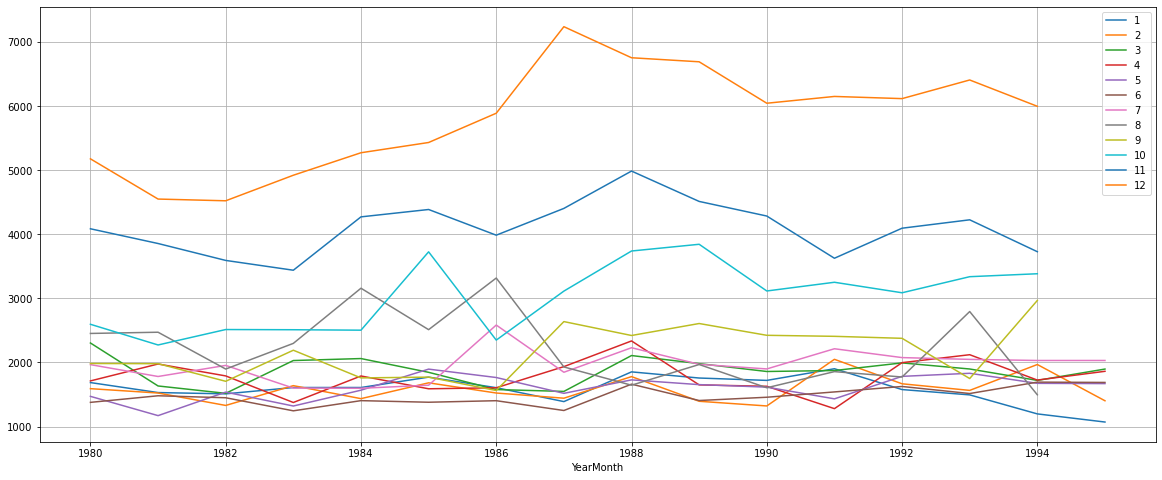

In [33]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

#### Plot the Empirical Cumulative Distribution.

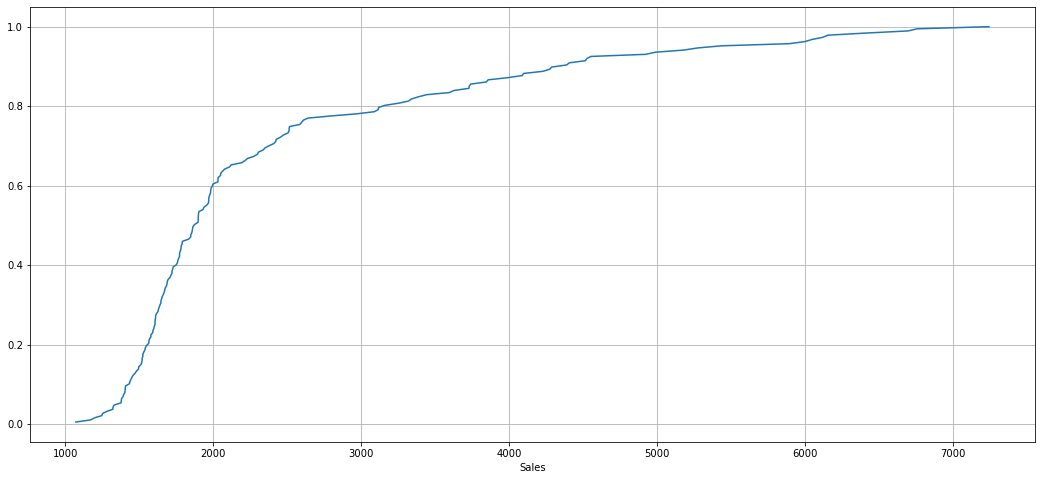

In [34]:
# statistics
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df_sparkling['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

#### Plot the average SparklingSales per month and the month on month percentage change of SparklingSales.

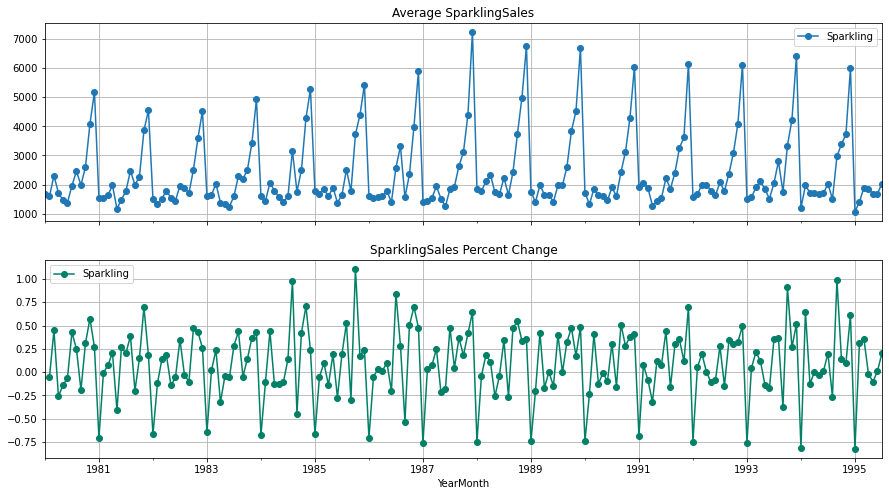

In [37]:
# group by date and get average RetailSales, and precent change
average    = df_sparkling.groupby(df_sparkling.index)["Sparkling"].mean()
pct_change = df_sparkling.groupby(df_sparkling.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average SparklingSales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="SparklingSales Percent Change",grid=True)

#### Decompose the Time Series and plot the different components.


In [38]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

##### Additive Decomposition

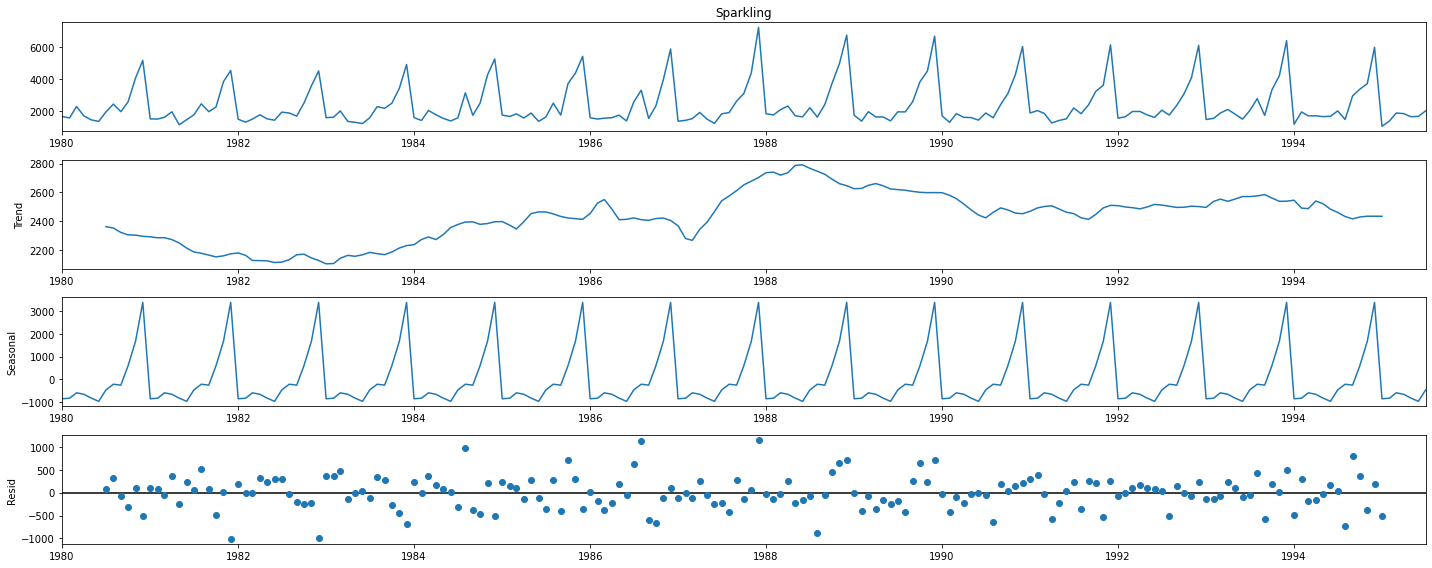

In [39]:
decomposition = seasonal_decompose(df_sparkling['Sparkling'],model='additive')
decomposition.plot();

In [40]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    -854.260599
1980-02-01    -830.350678
1980-03-01    -592.356630
1980-04-01    -658.490559
1980-05-01    -824.416154
1980-06-01    -967.434011
1980-07-01    -465.502265
1980-08-01    -214.332821
1980-09-01    -254.677265
1980-10-01     599.769957
1980-11-01    1675.067179
1980-12-01    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01     70.835599
1980-08-01    315.999487
1980-09-01    -81.864401
1980-10-01   -307.353290


##### Multiplicative Decomposition

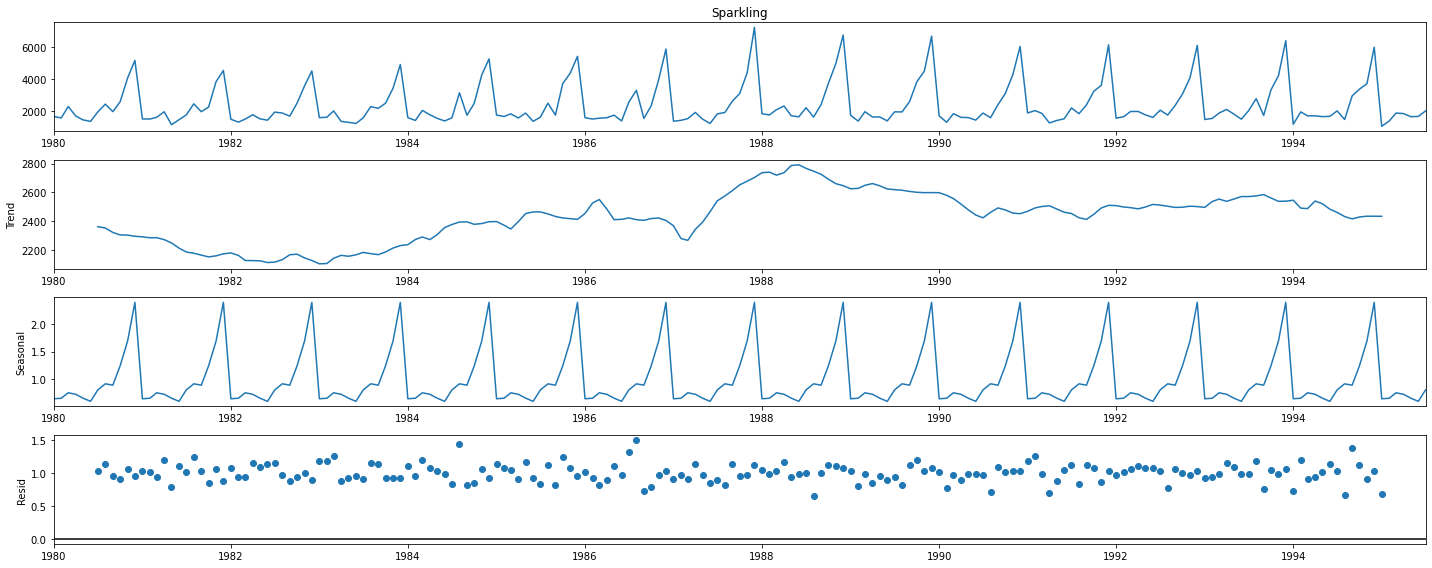

In [41]:
decomposition = seasonal_decompose(df_sparkling['Sparkling'],model='multiplicative')
decomposition.plot();

In [42]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01            NaN
1980-02-01            NaN
1980-03-01            NaN
1980-04-01            NaN
1980-05-01            NaN
1980-06-01            NaN
1980-07-01    2360.666667
1980-08-01    2351.333333
1980-09-01    2320.541667
1980-10-01    2303.583333
1980-11-01    2302.041667
1980-12-01    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01    0.649843
1980-02-01    0.659214
1980-03-01    0.757440
1980-04-01    0.730351
1980-05-01    0.660609
1980-06-01    0.603468
1980-07-01    0.809164
1980-08-01    0.918822
1980-09-01    0.894367
1980-10-01    1.241789
1980-11-01    1.690158
1980-12-01    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01         NaN
1980-02-01         NaN
1980-03-01         NaN
1980-04-01         NaN
1980-05-01         NaN
1980-06-01         NaN
1980-07-01    1.029230
1980-08-01    1.135407
1980-09-01    0.955954
1980-10-01    0.907513
1980-11-01    1.050423
1980-12-01    0.946770
Name: resi

#### Check for stationarity of the whole Time Series data.

In [43]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

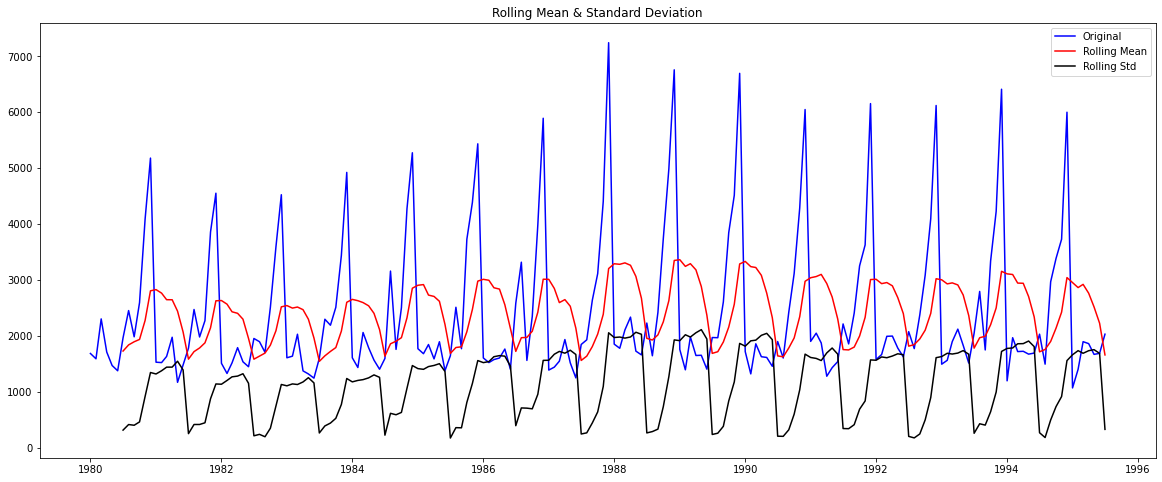

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [44]:
test_stationarity(df_sparkling['Sparkling'])

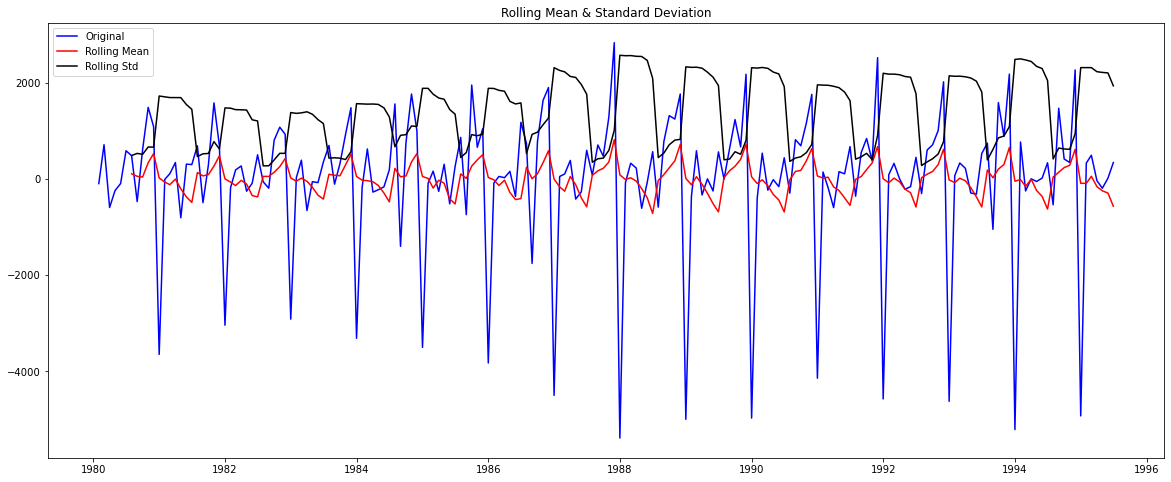

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [45]:
test_stationarity(df_sparkling['Sparkling'].diff().dropna())

#### Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.


In [46]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

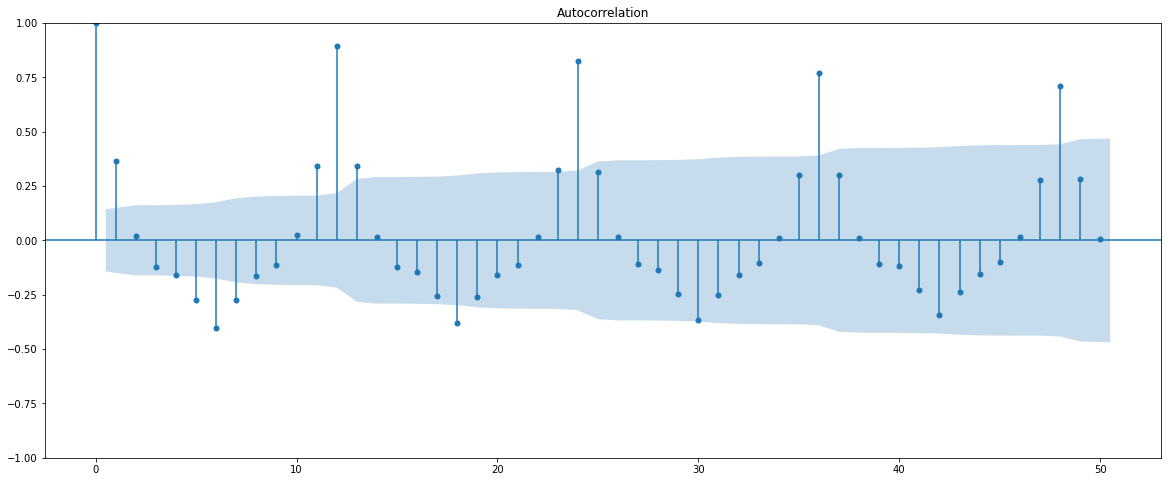

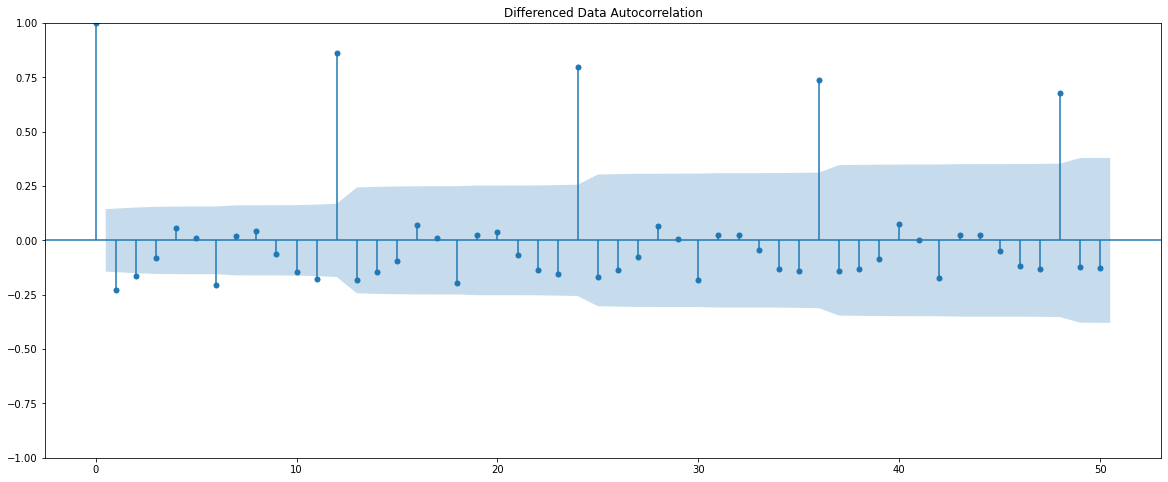

In [47]:
plot_acf(df_sparkling['Sparkling'],lags=50)
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


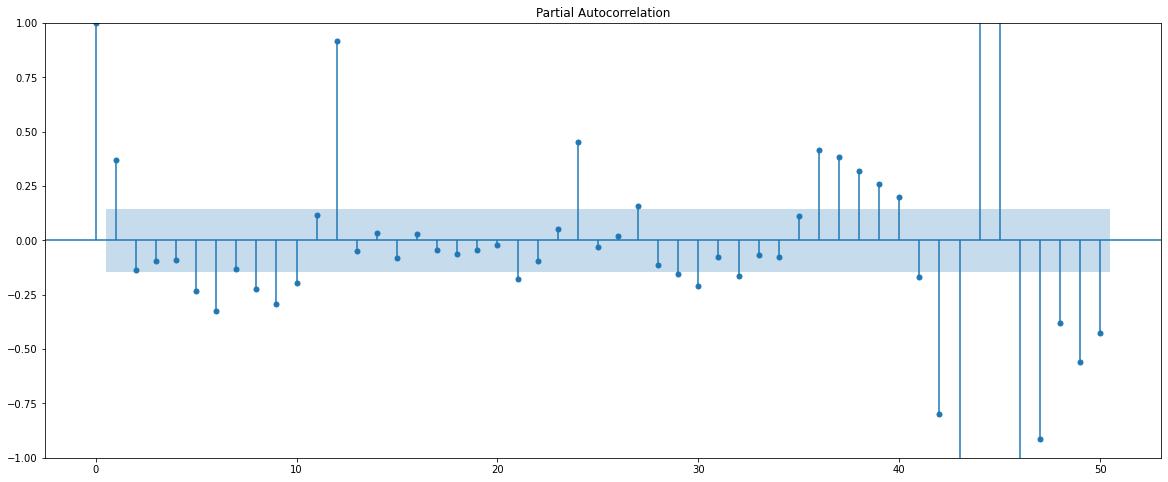

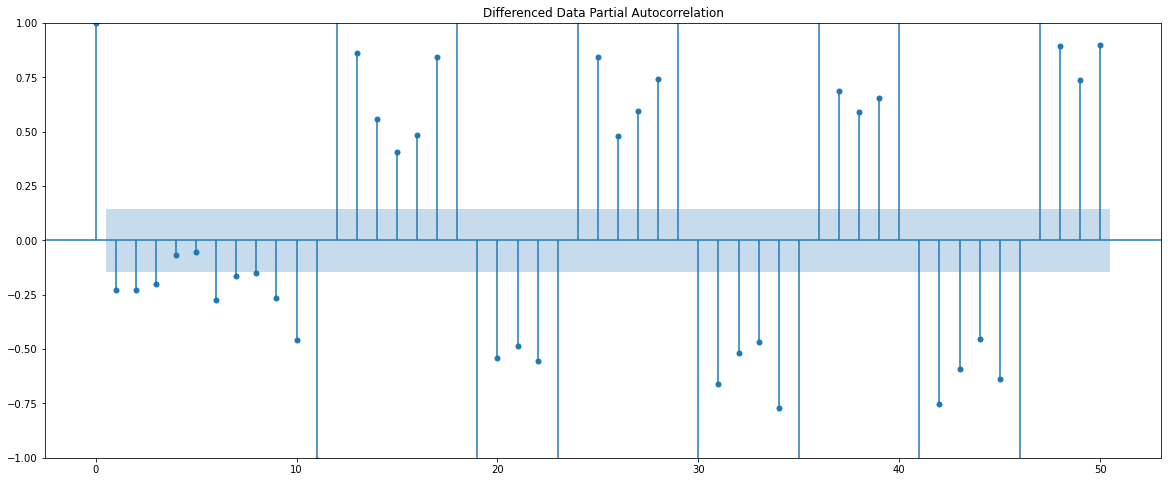

In [48]:
plot_pacf(df_sparkling['Sparkling'],lags=50)
plot_pacf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

### 3. Split the data into training and test. The test data should start in 1991. 

#### Training Data is till the end of 1990. Test Data is from the beginning of 1991 to the last time stamp provided.

In [49]:
train=df_sparkling[df_sparkling.index.year < 1991]
test=df_sparkling[df_sparkling.index.year >= 1991]

In [50]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [51]:
print('First few rows of Training Data')
display(train.head())

print('Last few rows of Training Data')
display(train.tail())

print('First few rows of Test Data')
display(test.head())

print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

Last few rows of Training Data


Sparkling
YearMonth            
1990-08-01       1605
1990-09-01       2424
1990-10-01       3116
1990-11-01       4286
1990-12-01       6047

First few rows of Test Data


Sparkling
YearMonth            
1991-01-01       1902
1991-02-01       2049
1991-03-01       1874
1991-04-01       1279
1991-05-01       1432

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-01       1897
1995-04-01       1862
1995-05-01       1670
1995-06-01       1688
1995-07-01       2031

In [52]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


#### Check for stationarity of the Training Data Time Series.

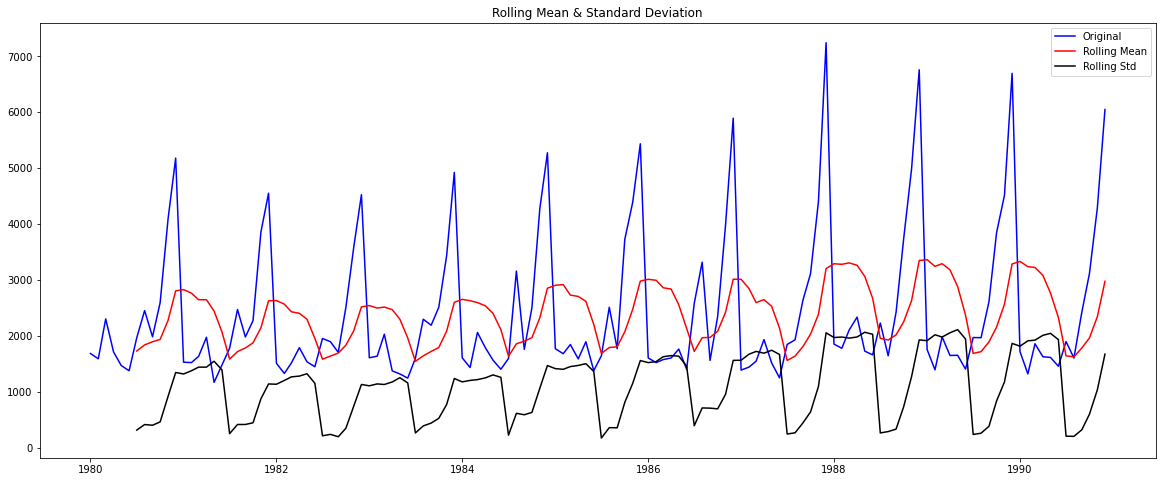

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [53]:
test_stationarity(train['Sparkling'])

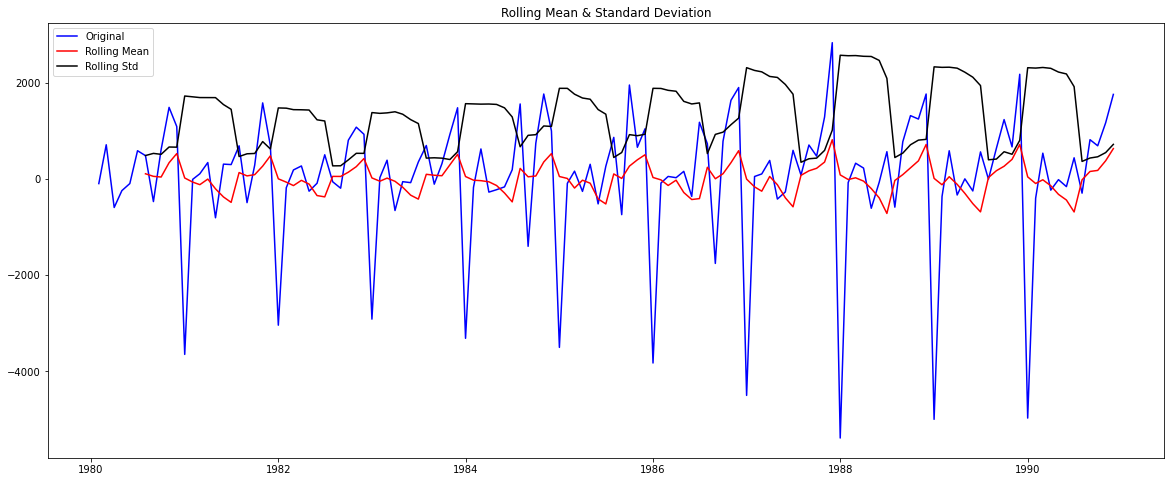

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [54]:
test_stationarity(train['Sparkling'].diff().dropna())

### 4. Build various exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other models such as regression,naïve forecast models, simple average models etc. should also be built on the training data and check the performance on the test data using RMSE.

##### Method 1: Linear Regression on Time

In [56]:
df1         = df_sparkling.copy() # Make a copy
time        = [i+1 for i in range(len(df_sparkling))]
df1['time'] = time

df1.head(5)

Sparkling  time
YearMonth                  
1980-01-01       1686     1
1980-02-01       1591     2
1980-03-01       2304     3
1980-04-01       1712     4
1980-05-01       1471     5

In [57]:
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

In [58]:
x_train = train.drop('Sparkling', axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

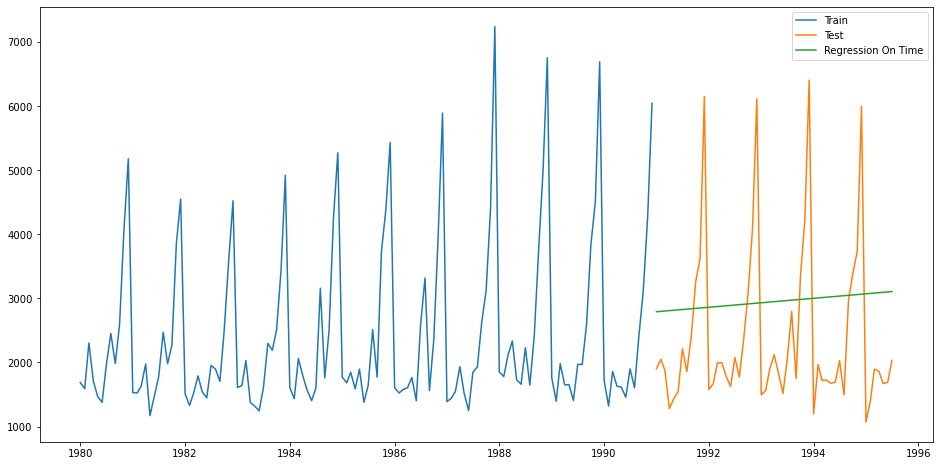

In [68]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

#### Defining the functions for calculating the accuracy metrics.

##### Model Evaluation

In [63]:
from sklearn import metrics

In [73]:
from math  import sqrt
from sklearn.metrics import  mean_squared_error
rmse = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
RMSE = round(rmse, 3)
print("For RegressionOnTime,  RMSE is %3.3f " %(RMSE))

For RegressionOnTime,  RMSE is 1389.135 


In [139]:
resultsDf = pd.DataFrame({'Method':['LinearRegression'], 'RMSE': [RMSE]})
resultsDf

Method      RMSE
0  LinearRegression  1389.135

### Method 2: Naive Approach:  𝑦̂ 𝑡+1=𝑦𝑡 ¶

In [74]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [75]:
train.tail()

Sparkling  time
YearMonth                  
1990-08-01       1605   128
1990-09-01       2424   129
1990-10-01       3116   130
1990-11-01       4286   131
1990-12-01       6047   132

In [76]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    6047
1991-02-01    6047
1991-03-01    6047
1991-04-01    6047
1991-05-01    6047
Name: naive, dtype: int64

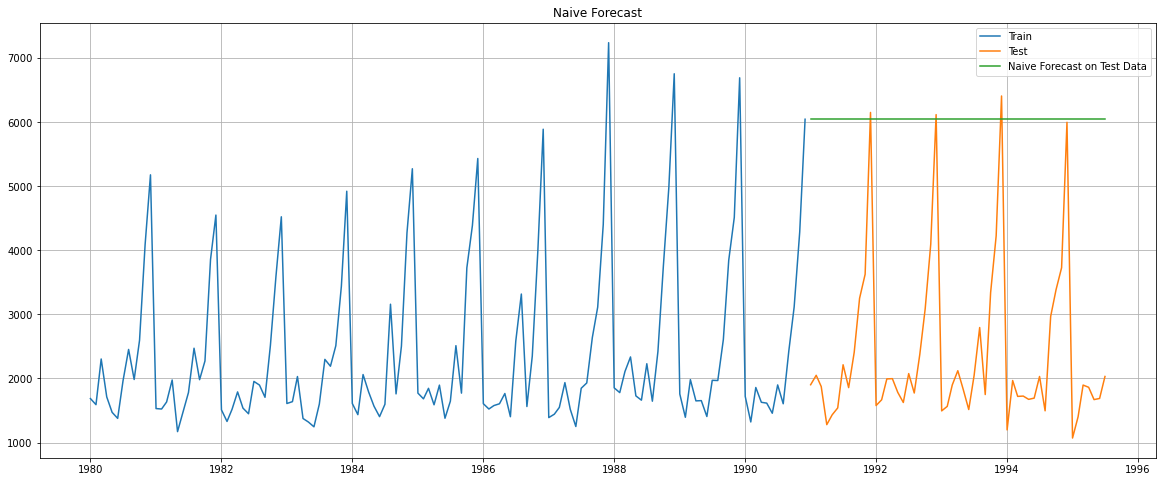

In [77]:
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [78]:
rmse_model2_test = metrics.mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [140]:
tempResultsDf = pd.DataFrame({'Method':['Naive_model'], 'RMSE': [rmse_model2_test]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0  LinearRegression  1389.135000
0       Naive_model  3864.279352

### Method 3: Simple Average

In [79]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [80]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  time  mean_forecast
YearMonth                                 
1991-01-01       1902   133    2403.780303
1991-02-01       2049   134    2403.780303
1991-03-01       1874   135    2403.780303
1991-04-01       1279   136    2403.780303
1991-05-01       1432   137    2403.780303

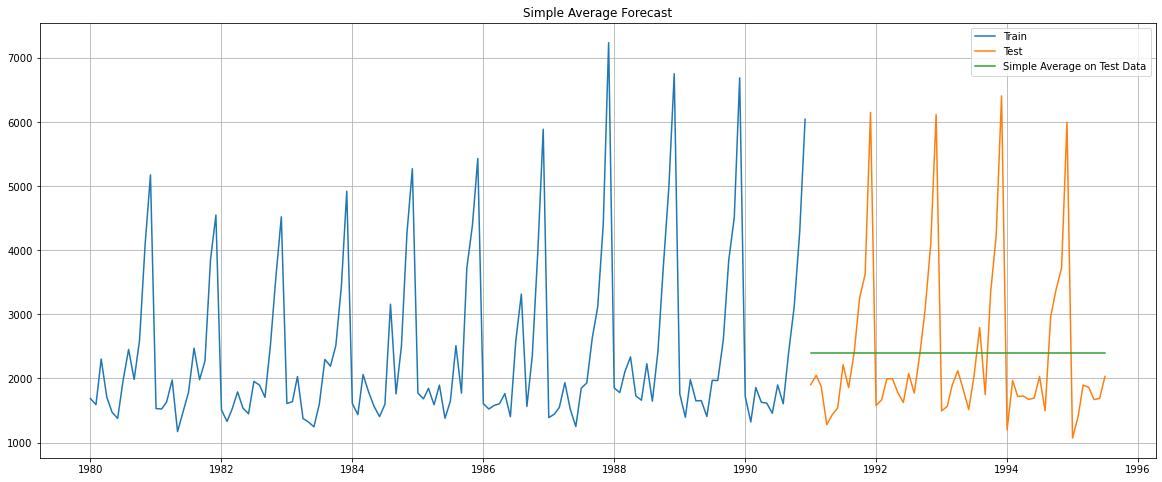

In [81]:
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')

plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

##### Model Evaluation

In [82]:
rmse_model3_test = metrics.mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [141]:
    tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'RMSE': [rmse_model3_test]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method         RMSE
0  LinearRegression  1389.135000
0       Naive_model  3864.279352
0    Simple Average  1275.081804

In [115]:

resultsDf

Method         RMSE
0  LinearRegression  1389.135000
0       Naive_model  3864.279352
0    Simple Average  1275.081804

### Method 4: Moving Average(MA)

In [84]:
MovingAverage = df_sparkling.copy()
MovingAverage.head()

Sparkling
YearMonth            
1980-01-01       1686
1980-02-01       1591
1980-03-01       2304
1980-04-01       1712
1980-05-01       1471

In [87]:
df1['moving_avg_forecast_4']  = df_sparkling['Sparkling'].rolling(4).mean()
df1['moving_avg_forecast_6']  = df_sparkling['Sparkling'].rolling(6).mean()
df1['moving_avg_forecast_8']  = df_sparkling['Sparkling'].rolling(8).mean()
df1['moving_avg_forecast_12'] = df_sparkling['Sparkling'].rolling(12).mean()

For Moving Average model, moving_avg_forecast_4  RMSE is 1156.590
For Moving Average model, moving_avg_forecast_6  RMSE is 1283.927
For Moving Average model, moving_avg_forecast_8  RMSE is 1342.568
For Moving Average model, moving_avg_forecast_12  RMSE is 1267.925


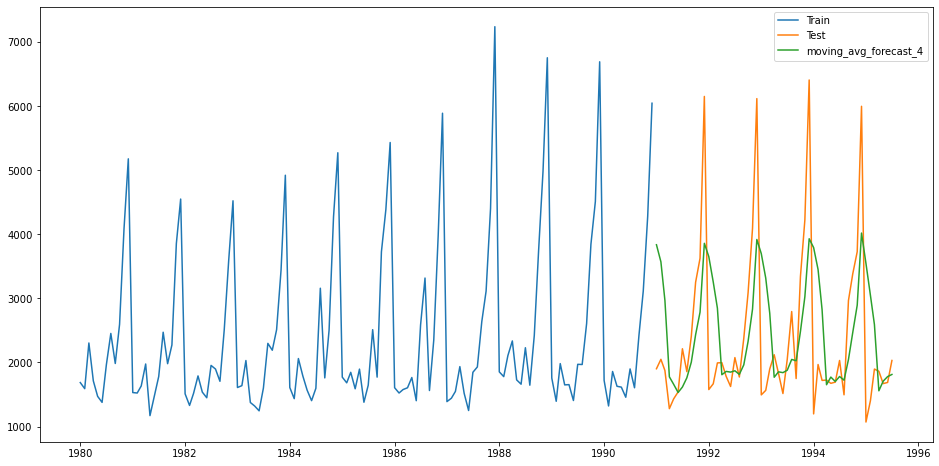

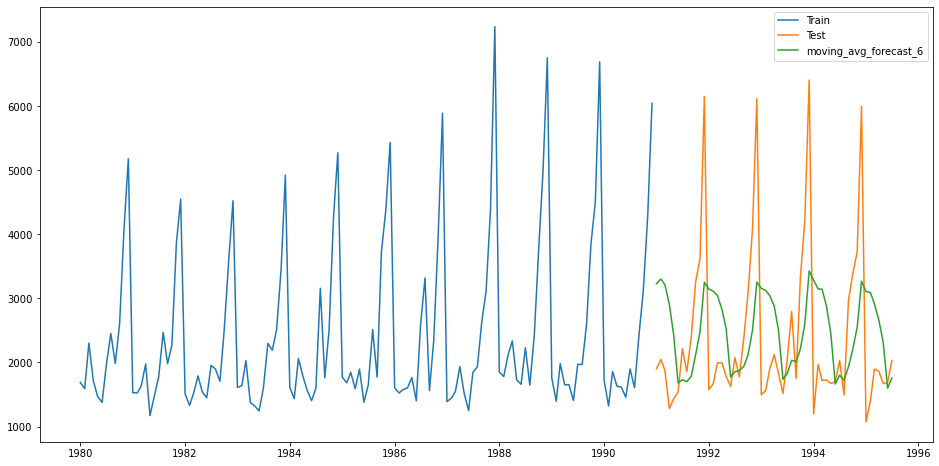

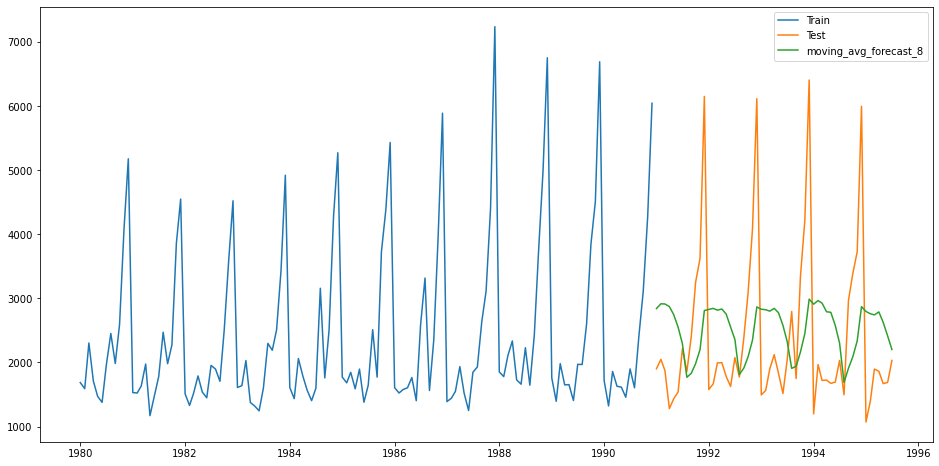

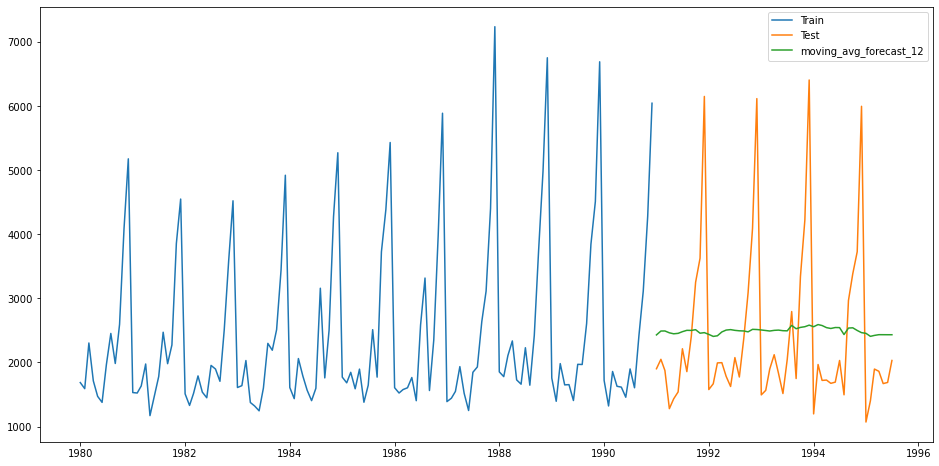

In [132]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df1[df1.index.year < 1991]
test=df1[df1.index.year >= 1991]

y_hat_avg = test.copy()
    
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_4'], label = 'moving_avg_forecast_4')
plt.legend(loc = 'best')
rmse_mov_avg_4 = sqrt(mean_squared_error(test.Sparkling, y_hat_avg['moving_avg_forecast_4']))
rmse_mov_avg_4 = round(rmse_mov_avg_4, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_6'], label = 'moving_avg_forecast_6')
plt.legend(loc = 'best')
rmse_mov_avg_6 = sqrt(mean_squared_error(test.Sparkling, y_hat_avg['moving_avg_forecast_6']))
rmse_mov_avg_6 = round(rmse_mov_avg_6, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_8'], label = 'moving_avg_forecast_8')
plt.legend(loc = 'best')
rmse_mov_avg_8 = sqrt(mean_squared_error(test.Sparkling, y_hat_avg['moving_avg_forecast_8']))
rmse_mov_avg_8 = round(rmse_mov_avg_8, 3)

plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast_12'], label = 'moving_avg_forecast_12')
plt.legend(loc = 'best')
rmse_mov_avg_12 = sqrt(mean_squared_error(test.Sparkling, y_hat_avg['moving_avg_forecast_12']))
rmse_mov_avg_12 = round(rmse_mov_avg_12, 3)



print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_4', rmse_mov_avg_4))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_6', rmse_mov_avg_6))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_8', rmse_mov_avg_8))

print("For Moving Average model, %s  RMSE is %3.3f" %('moving_avg_forecast_12', rmse_mov_avg_12))

In [142]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_4'], 'RMSE': [rmse_mov_avg_4]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method         RMSE
0       LinearRegression  1389.135000
0            Naive_model  3864.279352
0         Simple Average  1275.081804
0  moving_avg_forecast_4  1156.590000

In [143]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_6'], 'RMSE': [rmse_mov_avg_6]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method         RMSE
0       LinearRegression  1389.135000
0            Naive_model  3864.279352
0         Simple Average  1275.081804
0  moving_avg_forecast_4  1156.590000
0  moving_avg_forecast_6  1283.927000

In [144]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_8'], 'RMSE': [rmse_mov_avg_8]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method         RMSE
0       LinearRegression  1389.135000
0            Naive_model  3864.279352
0         Simple Average  1275.081804
0  moving_avg_forecast_4  1156.590000
0  moving_avg_forecast_6  1283.927000
0  moving_avg_forecast_8  1342.568000

In [146]:
    tempResultsDf = pd.DataFrame({'Method':['moving_avg_forecast_12'], 'RMSE': [rmse_mov_avg_12]})
    resultsDf = pd.concat([resultsDf, tempResultsDf])
    resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000

In [147]:

    resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000

In [137]:
# resultsDf.drop(index=0,inplace=True)

### Method 5: Simple Exponential Smoothing

In [90]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [91]:
model = SimpleExpSmoothing(train['Sparkling'])

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [92]:
model_fit = model.fit(optimized = True)

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [93]:
print('')
print('== Simple Exponential Smoothing Parameters == ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing Parameters == 


Smoothing Level 0.0496
Initial Level 1818.5358



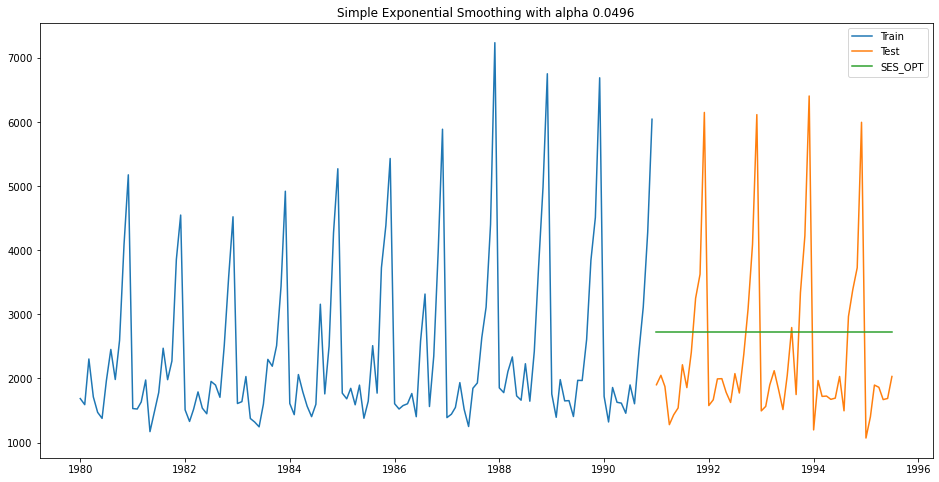

In [94]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sparkling'], label = 'Train')
plt.plot(test.index, test['Sparkling'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [96]:
rmse_opt =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt))

For alpha = 0.05,  RMSE is 1316.0355 


In [148]:
tempResultsDf = pd.DataFrame({'Method': 'SES', 'RMSE': [rmse_opt]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487

### Method 6: Holt's Linear Trend Method (Double Exponential Smoothing)

In [149]:
import statsmodels.api as sm

In [150]:
y_hat_avg = test.copy()

In [158]:
model_fit = Holt(np.asarray(train['Sparkling'])).fit()

C:\Users\rakes\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [159]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(test))

In [163]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)

print('Smoothing Level', alpha_value )
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.6886
Initial Level 1686.0



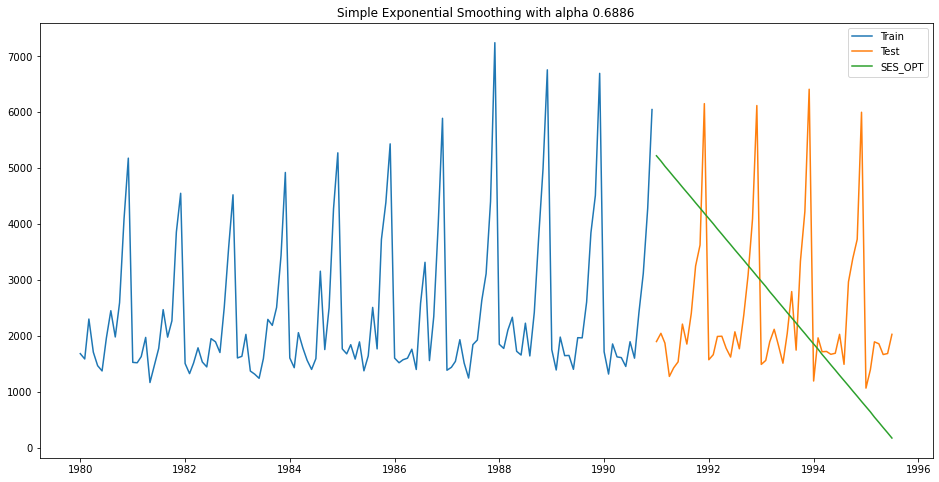

In [164]:
y_hat_avg['SES']     = model_fit.forecast(len(test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(train.index, train['Sparkling'], label = 'Train')
plt.plot(test.index, test['Sparkling'],   label = 'Test')
plt.plot(test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [165]:
rmse_opt_double =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg.SES))

print("For alpha = %1.2f,  RMSE is %3.4f " %(alpha_value, rmse_opt_double))

For alpha = 0.69,  RMSE is 2007.2385 


In [167]:
tempResultsDf = pd.DataFrame({'Method': "Holt's Linear Trend", 'RMSE': [rmse_opt_double]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526

In [168]:
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526

### Method 7: Holt-Winters Method - Additive seasonality

In [169]:
y_hat_avg = test.copy()

In [170]:
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [171]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(test))

In [173]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_trend'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_trend'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.1113
Smoothing Slope:  0.0124
Smoothing Seasonal:  0.4607
Initial Level:  2356.578
Initial Slope:  -0.1024
Initial Seasons:  [-636.2332 -722.9832 -398.6441 -473.4305 -808.4247 -815.3499 -384.2307
   72.9948 -237.4423  272.3261 1541.3774 2590.0769]



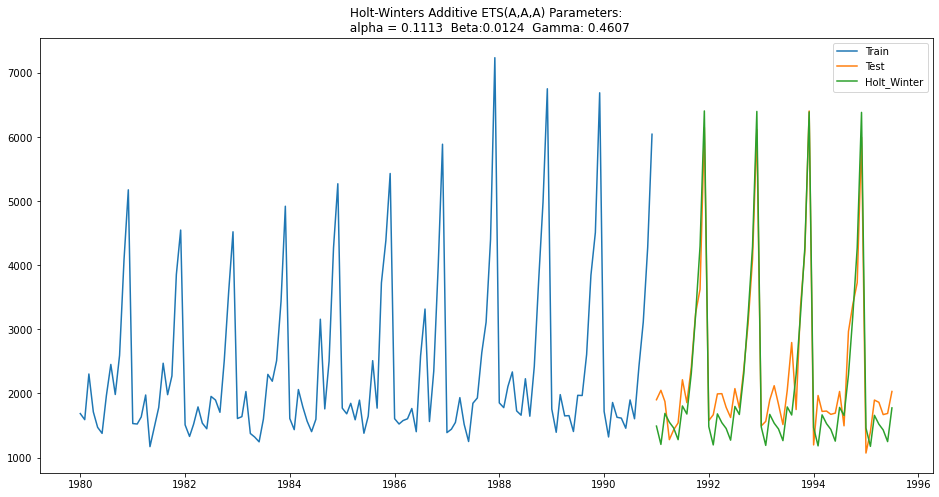

In [175]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Additive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [177]:
rmse_opt_holt_winter =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter']))

print("For Holt Winter alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f" %(alpha_value, beta_value, gamma_value, rmse_opt_holt_winter))

For Holt Winter alpha = 0.11, beta = 0.01, gamma = 0.46, RMSE is 378.9510


In [178]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter', 'RMSE': [rmse_opt_holt_winter]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526
0             Holt_Winter   378.951023

### Method 8: Holt-Winters Method - Multiplicative Model


In [179]:
y_hat_avg = test.copy()

In [182]:
model_fit = ExponentialSmoothing(np.asarray(train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [184]:
y_hat_avg['Holt_Winter_Mul'] = model_fit.forecast(len(test))

In [185]:
print('')
print('== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_trend'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_trend'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Multiplicative ETS(A,A,M) Parameters ==

Smoothing Level:  0.1113
Smoothing Slope:  0.0495
Smoothing Seasonal:  0.3621
Initial Level:  2356.4968
Initial Slope:  -10.1879
Initial Seasons:  [0.713  0.6824 0.9076 0.8052 0.656  0.6541 0.8862 1.1335 0.9205 1.2134
 1.8734 2.3781]



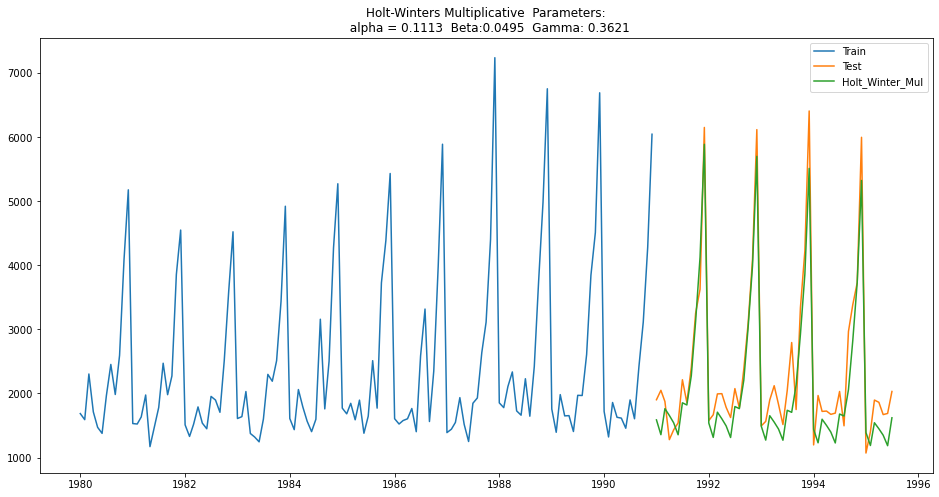

In [186]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_Mul'], label='Holt_Winter_Mul')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [188]:
rmse_opt_holt_mul =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_Winter_Mul']))

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f" %(alpha_value, beta_value, gamma_value, rmse_opt_holt_mul))

For alpha = 0.11, beta = 0.05, gamma = 0.36, RMSE is 404.2868


In [189]:
tempResultsDf = pd.DataFrame({'Method': 'Holt_Winter Mul', 'RMSE': [rmse_opt_holt_mul]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526
0             Holt_Winter   378.951023
0         Holt_Winter Mul   404.286809

### 5. Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment. Note: Stationarity should be checked at alpha = 0.05.

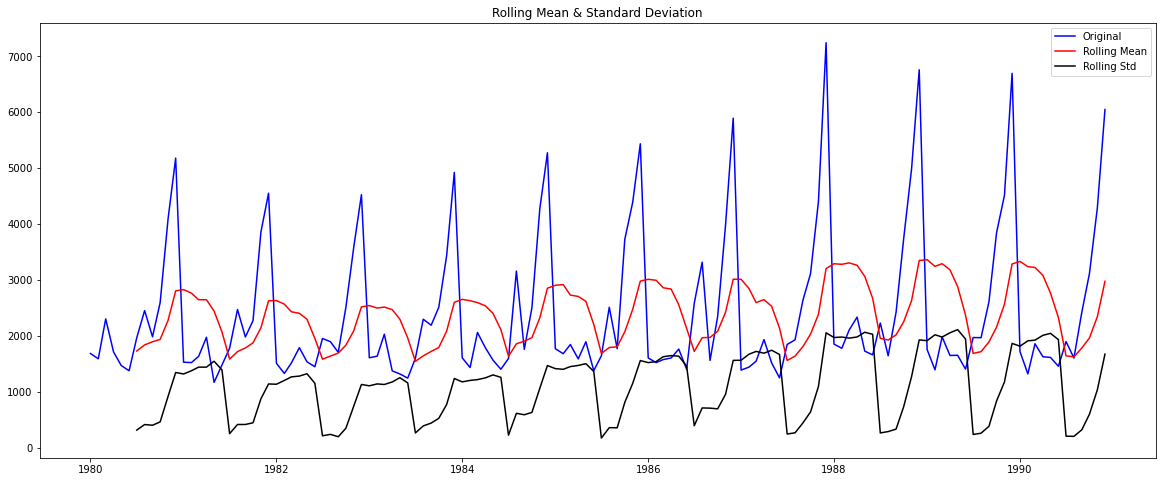

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [190]:
test_stationarity(train['Sparkling'])

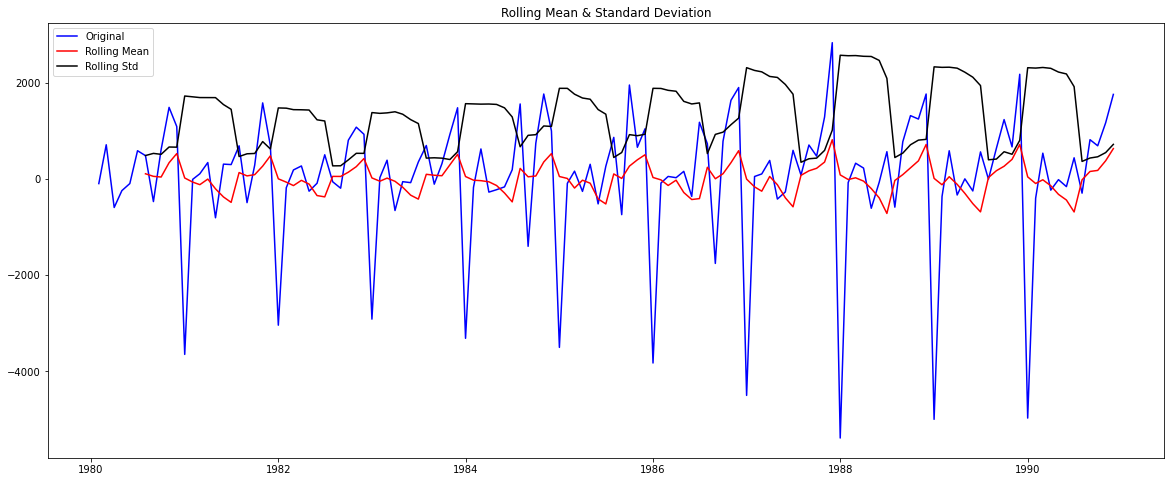

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [191]:
test_stationarity(train['Sparkling'].diff().dropna())

In [192]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-01 to 1990-12-01
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sparkling               132 non-null    int64  
 1   time                    132 non-null    int64  
 2   moving_avg_forecast_4   129 non-null    float64
 3   moving_avg_forecast_6   127 non-null    float64
 4   moving_avg_forecast_8   125 non-null    float64
 5   moving_avg_forecast_12  121 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 7.2 KB


### 6. Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

#### Method 9: Auto ARIMA Model

In [194]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 6)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (0, 1, 4)
Model: (0, 1, 5)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (1, 1, 4)
Model: (1, 1, 5)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (2, 1, 4)
Model: (2, 1, 5)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)
Model: (3, 1, 4)
Model: (3, 1, 5)
Model: (4, 1, 0)
Model: (4, 1, 1)
Model: (4, 1, 2)
Model: (4, 1, 3)
Model: (4, 1, 4)
Model: (4, 1, 5)
Model: (5, 1, 0)
Model: (5, 1, 1)
Model: (5, 1, 2)
Model: (5, 1, 3)
Model: (5, 1, 4)
Model: (5, 1, 5)


In [195]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [198]:
from statsmodels.tsa.arima.model import ARIMA

import warnings

warnings.filterwarnings("ignore")

In [199]:
for param in pdq:
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)  

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(0, 1, 3) - AIC:2233.9948577793975
ARIMA(0, 1, 4) - AIC:2235.1737364695036
ARIMA(0, 1, 5) - AIC:2237.5192364965333
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.5272004508324
ARIMA(1, 1, 3) - AIC:2235.6078073353247
ARIMA(1, 1, 4) - AIC:2227.7369769929273
ARIMA(1, 1, 5) - AIC:2263.042153203207
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.7776263084434
ARIMA(2, 1, 2) - AIC:2213.5092122831566
ARIMA(2, 1, 3) - AIC:2232.9370761971877
ARIMA(2, 1, 4) - AIC:2222.921832371351
ARIMA(2, 1, 5) - AIC:2350.804815554723
ARIMA(3, 1, 0) - AIC:2257.72337899794
ARIMA(3, 1, 1) - AIC:2235.498924009065
ARIMA(3, 1, 2) - AIC:2230.952332594816
ARIMA(3, 1, 3) - AIC:2221.458954306803
ARIMA(3, 1, 4) - AIC:2219.8494628492963
ARIMA(3, 1, 5) - AIC:2380.99139569164
ARIMA(4, 1, 0) - AIC:2259.741841399269
ARIMA(4, 1, 1) 

LinAlgError: LU decomposition error.

In [200]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
28  (4, 1, 4)   2213.11651
14  (2, 1, 2)  2213.509212
22  (3, 1, 4)  2219.849463
21  (3, 1, 3)  2221.458954
27  (4, 1, 3)  2222.904099
16  (2, 1, 4)  2222.921832
10  (1, 1, 4)  2227.736977
20  (3, 1, 2)  2230.952333
15  (2, 1, 3)  2232.937076
26  (4, 1, 2)  2233.062646
13  (2, 1, 1)  2233.777626
3   (0, 1, 3)  2233.994858
2   (0, 1, 2)  2234.408323
8   (1, 1, 2)    2234.5272
4   (0, 1, 4)  2235.173736
19  (3, 1, 1)  2235.498924
9   (1, 1, 3)  2235.607807
7   (1, 1, 1)  2235.755095
25  (4, 1, 1)  2237.073046
5   (0, 1, 5)  2237.519236
18  (3, 1, 0)  2257.723379
24  (4, 1, 0)  2259.741841
12  (2, 1, 0)  2260.365744
11  (1, 1, 5)  2263.042153
1   (0, 1, 1)  2263.060016
6   (1, 1, 0)  2266.608539
0   (0, 1, 0)  2267.663036
17  (2, 1, 5)  2350.804816
23  (3, 1, 5)  2380.991396

In [218]:
auto_ARIMA = ARIMA(train['Sparkling'], order=(4, 1, 4))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1097.558
Date:                Thu, 22 Dec 2022   AIC                           2213.117
Time:                        16:06:56   BIC                           2238.993
Sample:                    01-01-1980   HQIC                          2223.631
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4455      0.108     -4.123      0.000      -0.657      -0.234
ar.L2         -0.4486      0.075     -5.952      0.000      -0.596      -0.301
ar.L3         -0.4474      0.088     -5.094      0.0

In [219]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [215]:
from sklearn.metrics import  mean_squared_error
rmse_auto_arima = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print('RMSE:',rmse_auto_arima)


RMSE: 1229.0304371707914


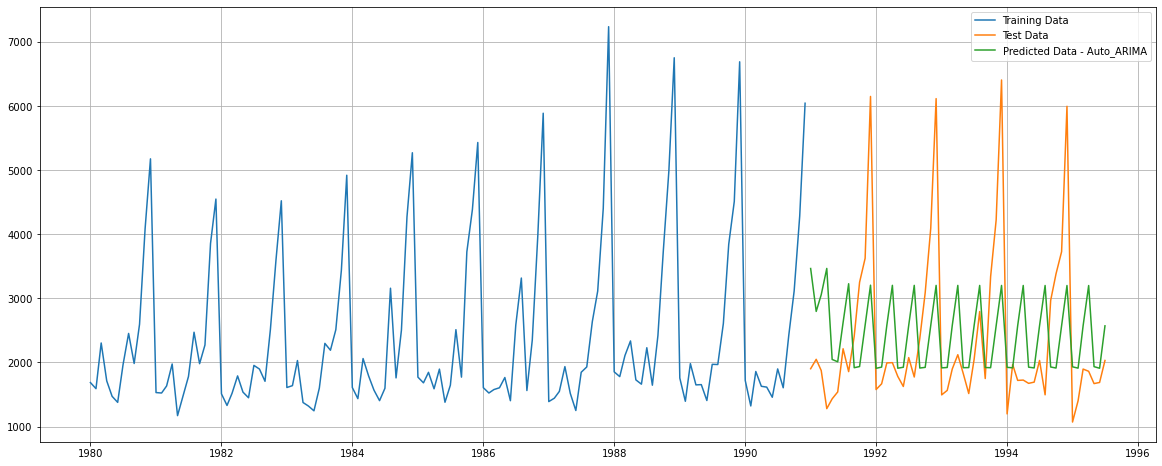

In [221]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_ARIMA,label='Predicted Data - Auto_ARIMA')
plt.legend(loc='best')
plt.grid();

In [223]:
tempResultsDf = pd.DataFrame({'Method': ['AUTO_ARIMA(4, 1, 4)'],'RMSE': [rmse_auto_arima]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526
0             Holt_Winter   378.951023
0         Holt_Winter Mul   404.286809
0          ARIMA(4, 1, 4)  1229.030437
0     AUTO_ARIMA(4, 1, 4)  1229.030437

### 7. Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

#### Method 10: Manual ARIMA Model

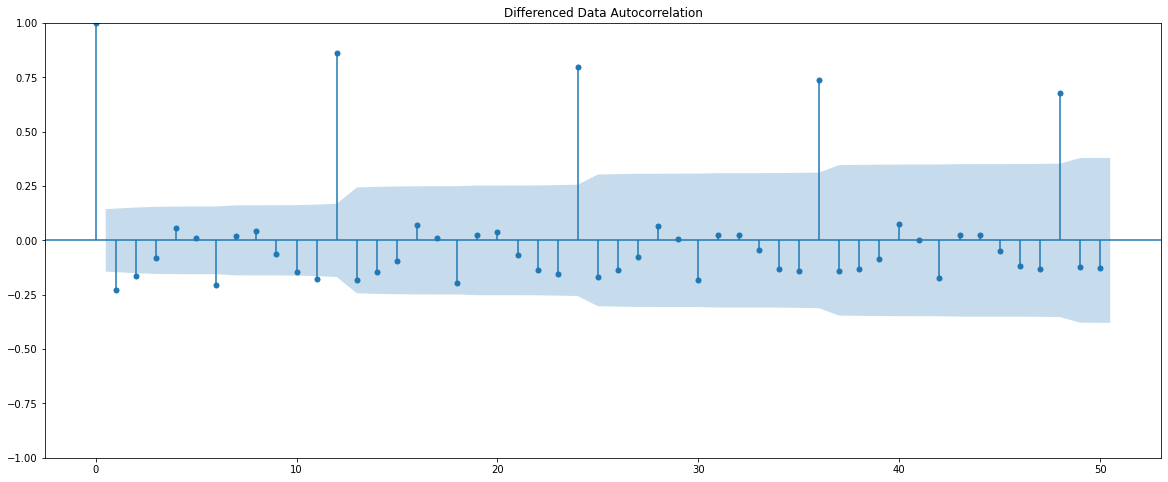

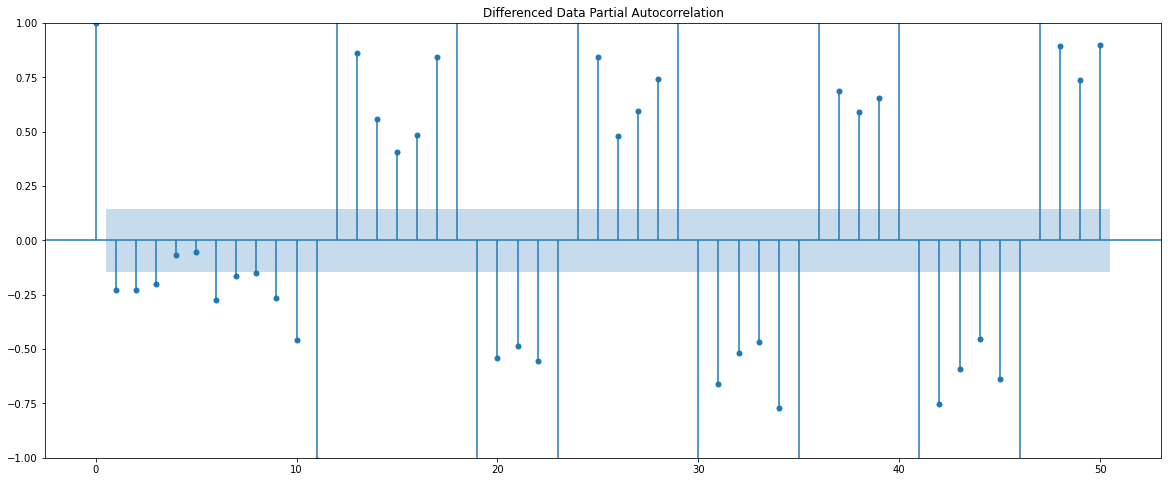

In [226]:
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [233]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(4,1,4))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1097.558
Date:                Thu, 22 Dec 2022   AIC                           2213.117
Time:                        16:41:28   BIC                           2238.993
Sample:                    01-01-1980   HQIC                          2223.631
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4455      0.108     -4.123      0.000      -0.657      -0.234
ar.L2         -0.4486      0.075     -5.952      0.000      -0.596      -0.301
ar.L3         -0.4474      0.088     -5.094      0.0

In [228]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [231]:
rmse_manual_arima = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print('RMSE:',rmse_manual_arima)


RMSE: 1299.9796397916396


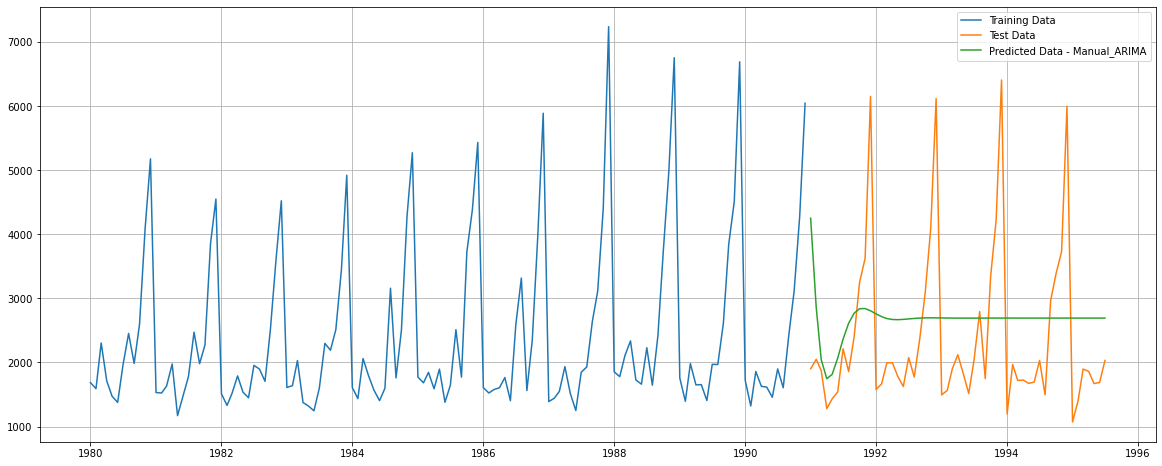

In [232]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_ARIMA,label='Predicted Data - Manual_ARIMA')
plt.legend(loc='best')
plt.grid();

In [235]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_ARIMA(4, 1, 4)'],'RMSE': [rmse_manual_arima]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0        LinearRegression  1389.135000
0             Naive_model  3864.279352
0          Simple Average  1275.081804
0   moving_avg_forecast_4  1156.590000
0   moving_avg_forecast_6  1283.927000
0   moving_avg_forecast_8  1342.568000
0  moving_avg_forecast_12  1267.925000
0                     SES  1316.035487
0     Holt's Linear Trend  2007.238526
0             Holt_Winter   378.951023
0         Holt_Winter Mul   404.286809
0          ARIMA(4, 1, 4)  1229.030437
0     AUTO_ARIMA(4, 1, 4)  1229.030437
0   Manual_ARIMA(4, 1, 4)  1299.979640

#### Method 11: Auto SARIMA Model_6

#### Setting the seasonality as 6 for the first iteration of the auto SARIMA model.

In [236]:
import itertools
p = q = range(0, 5)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (0, 1, 3)(0, 0, 3, 6)
Model: (0, 1, 4)(0, 0, 4, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (1, 1, 3)(1, 0, 3, 6)
Model: (1, 1, 4)(1, 0, 4, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)
Model: (2, 1, 3)(2, 0, 3, 6)
Model: (2, 1, 4)(2, 0, 4, 6)
Model: (3, 1, 0)(3, 0, 0, 6)
Model: (3, 1, 1)(3, 0, 1, 6)
Model: (3, 1, 2)(3, 0, 2, 6)
Model: (3, 1, 3)(3, 0, 3, 6)
Model: (3, 1, 4)(3, 0, 4, 6)
Model: (4, 1, 0)(4, 0, 0, 6)
Model: (4, 1, 1)(4, 0, 1, 6)
Model: (4, 1, 2)(4, 0, 2, 6)
Model: (4, 1, 3)(4, 0, 3, 6)
Model: (4, 1, 4)(4, 0, 4, 6)


In [237]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [238]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.37807617163
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.6355536892695
SARIMA(0, 1, 0)x(0, 0, 3, 6)7 - AIC:1863.7845154973322
SARIMA(0, 1, 0)x(0, 0, 4, 6)7 - AIC:1724.315535236527
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.5599844430967
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.9360123151866
SARIMA(0, 1, 0)x(1, 0, 3, 6)7 - AIC:1803.3929094940895
SARIMA(0, 1, 0)x(1, 0, 4, 6)7 - AIC:1696.0839513314863
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993617510475
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.9177805657137
SARIMA(0, 1, 0)x(2, 0, 3, 6)7 - AIC:1725.5376425549575
SARIMA(0, 1, 0)x(2, 0, 4, 6)7 - AIC:1636.468477269001
SARIMA(0, 1, 0)x(3, 0, 0, 6)7 - AIC:1748.7622668155268
SARIMA(0, 1, 0)x(3, 0, 1, 6)7 - AIC:1750.687995381667
SARIMA(0, 1, 0)x(3, 0, 2, 6)7 - AIC:1739.4489858030697
SARIMA(0, 1, 0)

SARIMA(1, 1, 1)x(0, 0, 1, 6)7 - AIC:2103.2471520746685
SARIMA(1, 1, 1)x(0, 0, 2, 6)7 - AIC:1906.397638139692
SARIMA(1, 1, 1)x(0, 0, 3, 6)7 - AIC:1814.6532925061952
SARIMA(1, 1, 1)x(0, 0, 4, 6)7 - AIC:1681.9224131318133
SARIMA(1, 1, 1)x(1, 0, 0, 6)7 - AIC:2109.6671209730434
SARIMA(1, 1, 1)x(1, 0, 1, 6)7 - AIC:2005.6125663858002
SARIMA(1, 1, 1)x(1, 0, 2, 6)7 - AIC:1856.077523801885
SARIMA(1, 1, 1)x(1, 0, 3, 6)7 - AIC:1736.7505310769861
SARIMA(1, 1, 1)x(1, 0, 4, 6)7 - AIC:1630.4046929448066
SARIMA(1, 1, 1)x(2, 0, 0, 6)7 - AIC:1776.9417677125841
SARIMA(1, 1, 1)x(2, 0, 1, 6)7 - AIC:1778.8222558039708
SARIMA(1, 1, 1)x(2, 0, 2, 6)7 - AIC:1743.3747278892304
SARIMA(1, 1, 1)x(2, 0, 3, 6)7 - AIC:1660.7244256913798
SARIMA(1, 1, 1)x(2, 0, 4, 6)7 - AIC:1576.911987335957
SARIMA(1, 1, 1)x(3, 0, 0, 6)7 - AIC:1689.951087171642
SARIMA(1, 1, 1)x(3, 0, 1, 6)7 - AIC:1686.6001160568671
SARIMA(1, 1, 1)x(3, 0, 2, 6)7 - AIC:1674.4447945897487
SARIMA(1, 1, 1)x(3, 0, 3, 6)7 - AIC:1662.6397445593268
SARIMA(1, 1, 1

SARIMA(2, 1, 2)x(0, 0, 1, 6)7 - AIC:2068.7780953835313
SARIMA(2, 1, 2)x(0, 0, 2, 6)7 - AIC:1889.7875404640256
SARIMA(2, 1, 2)x(0, 0, 3, 6)7 - AIC:1797.0726418702675
SARIMA(2, 1, 2)x(0, 0, 4, 6)7 - AIC:1664.389090704472
SARIMA(2, 1, 2)x(1, 0, 0, 6)7 - AIC:2074.11022177934
SARIMA(2, 1, 2)x(1, 0, 1, 6)7 - AIC:1955.6058951916443
SARIMA(2, 1, 2)x(1, 0, 2, 6)7 - AIC:1836.889941183051
SARIMA(2, 1, 2)x(1, 0, 3, 6)7 - AIC:1715.8070845639097
SARIMA(2, 1, 2)x(1, 0, 4, 6)7 - AIC:1614.5736650685951
SARIMA(2, 1, 2)x(2, 0, 0, 6)7 - AIC:1763.2946341000647
SARIMA(2, 1, 2)x(2, 0, 1, 6)7 - AIC:1760.8267440982167
SARIMA(2, 1, 2)x(2, 0, 2, 6)7 - AIC:1729.1925815225138
SARIMA(2, 1, 2)x(2, 0, 3, 6)7 - AIC:1647.2844069317334
SARIMA(2, 1, 2)x(2, 0, 4, 6)7 - AIC:1562.70189142771
SARIMA(2, 1, 2)x(3, 0, 0, 6)7 - AIC:1676.126655991079
SARIMA(2, 1, 2)x(3, 0, 1, 6)7 - AIC:1675.5877026659248
SARIMA(2, 1, 2)x(3, 0, 2, 6)7 - AIC:1663.522698262675
SARIMA(2, 1, 2)x(3, 0, 3, 6)7 - AIC:1651.8377388198044
SARIMA(2, 1, 2)x(3

SARIMA(3, 1, 3)x(0, 0, 1, 6)7 - AIC:2053.1966245731637
SARIMA(3, 1, 3)x(0, 0, 2, 6)7 - AIC:1912.6738893319507
SARIMA(3, 1, 3)x(0, 0, 3, 6)7 - AIC:1777.618193811148
SARIMA(3, 1, 3)x(0, 0, 4, 6)7 - AIC:1642.0581198705731
SARIMA(3, 1, 3)x(1, 0, 0, 6)7 - AIC:2068.7187606459806
SARIMA(3, 1, 3)x(1, 0, 1, 6)7 - AIC:1878.5920430035865
SARIMA(3, 1, 3)x(1, 0, 2, 6)7 - AIC:1813.4875018817704
SARIMA(3, 1, 3)x(1, 0, 3, 6)7 - AIC:1693.7219523958709
SARIMA(3, 1, 3)x(1, 0, 4, 6)7 - AIC:1641.5947862449098
SARIMA(3, 1, 3)x(2, 0, 0, 6)7 - AIC:1743.3184472684243
SARIMA(3, 1, 3)x(2, 0, 1, 6)7 - AIC:1745.063298442328
SARIMA(3, 1, 3)x(2, 0, 2, 6)7 - AIC:1713.15163340866
SARIMA(3, 1, 3)x(2, 0, 3, 6)7 - AIC:1631.0052088271987
SARIMA(3, 1, 3)x(2, 0, 4, 6)7 - AIC:1550.6927843841743
SARIMA(3, 1, 3)x(3, 0, 0, 6)7 - AIC:1661.1197391736227
SARIMA(3, 1, 3)x(3, 0, 1, 6)7 - AIC:1663.635658844291
SARIMA(3, 1, 3)x(3, 0, 2, 6)7 - AIC:1644.5677487858775
SARIMA(3, 1, 3)x(3, 0, 3, 6)7 - AIC:1636.5719100205033
SARIMA(3, 1, 3)

SARIMA(4, 1, 4)x(0, 0, 1, 6)7 - AIC:2030.7157960751601
SARIMA(4, 1, 4)x(0, 0, 2, 6)7 - AIC:1863.4522722632148
SARIMA(4, 1, 4)x(0, 0, 3, 6)7 - AIC:1772.714247131568
SARIMA(4, 1, 4)x(0, 0, 4, 6)7 - AIC:1633.2270830119148
SARIMA(4, 1, 4)x(1, 0, 0, 6)7 - AIC:2045.4348869959074
SARIMA(4, 1, 4)x(1, 0, 1, 6)7 - AIC:1857.0205007048996
SARIMA(4, 1, 4)x(1, 0, 2, 6)7 - AIC:1799.7948176345465
SARIMA(4, 1, 4)x(1, 0, 3, 6)7 - AIC:1740.0975997682847
SARIMA(4, 1, 4)x(1, 0, 4, 6)7 - AIC:1644.5792149107763
SARIMA(4, 1, 4)x(2, 0, 0, 6)7 - AIC:1736.5164452898898
SARIMA(4, 1, 4)x(2, 0, 1, 6)7 - AIC:1734.1739921997673
SARIMA(4, 1, 4)x(2, 0, 2, 6)7 - AIC:1768.7099366721063
SARIMA(4, 1, 4)x(2, 0, 3, 6)7 - AIC:1625.359090580107
SARIMA(4, 1, 4)x(2, 0, 4, 6)7 - AIC:1537.4309479757665
SARIMA(4, 1, 4)x(3, 0, 0, 6)7 - AIC:1651.654047235626
SARIMA(4, 1, 4)x(3, 0, 1, 6)7 - AIC:1655.5014376498925
SARIMA(4, 1, 4)x(3, 0, 2, 6)7 - AIC:1650.9677169756067
SARIMA(4, 1, 4)x(3, 0, 3, 6)7 - AIC:1626.7650754152046
SARIMA(4, 1, 

In [239]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
364  (2, 1, 4)  (2, 0, 4, 6)  1534.798431
114  (0, 1, 4)  (2, 0, 4, 6)  1535.344781
624  (4, 1, 4)  (4, 0, 4, 6)  1536.538349
489  (3, 1, 4)  (2, 0, 4, 6)   1536.61748
239  (1, 1, 4)  (2, 0, 4, 6)  1536.681702

In [240]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 4),
                                seasonal_order=(4, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(4, 0, 4, 6)   Log Likelihood                -753.900
Date:                           Fri, 23 Dec 2022   AIC                           1537.801
Time:                                   05:49:39   BIC                           1577.175
Sample:                                        0   HQIC                          1553.745
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2933      0.318     -4.063      0.000      -1.917      -0.670
ar.L2         -0.5392      0.281     -1.919

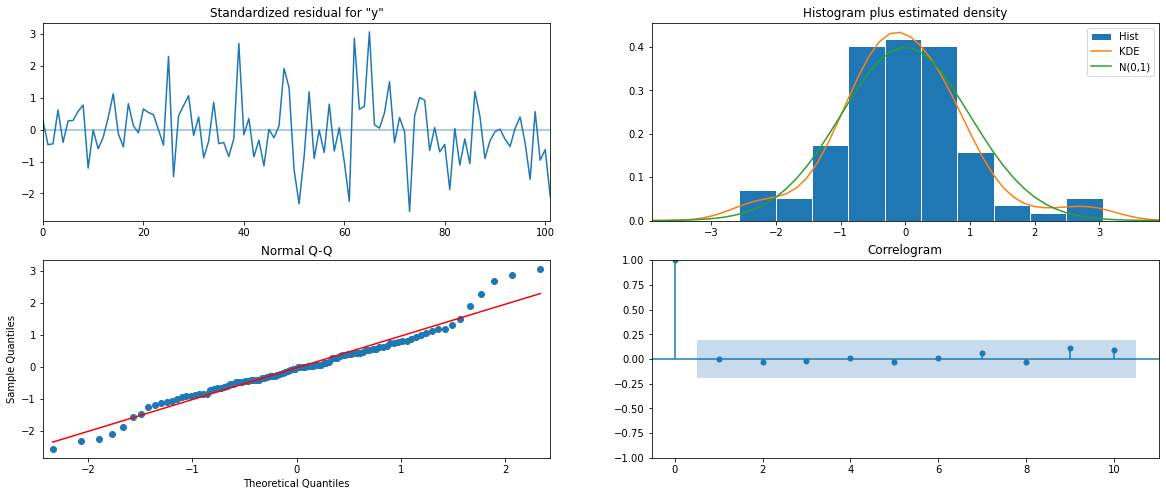

In [241]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [242]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))

In [243]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1235.151829  380.372775     489.634889    1980.668770
1  1164.937374  392.299189     396.045093    1933.829655
2  1680.152695  392.282168     911.293775    2449.011616
3  1673.450307  400.693307     888.105856    2458.794758
4  1218.555403  400.688287     433.220792    2003.890015

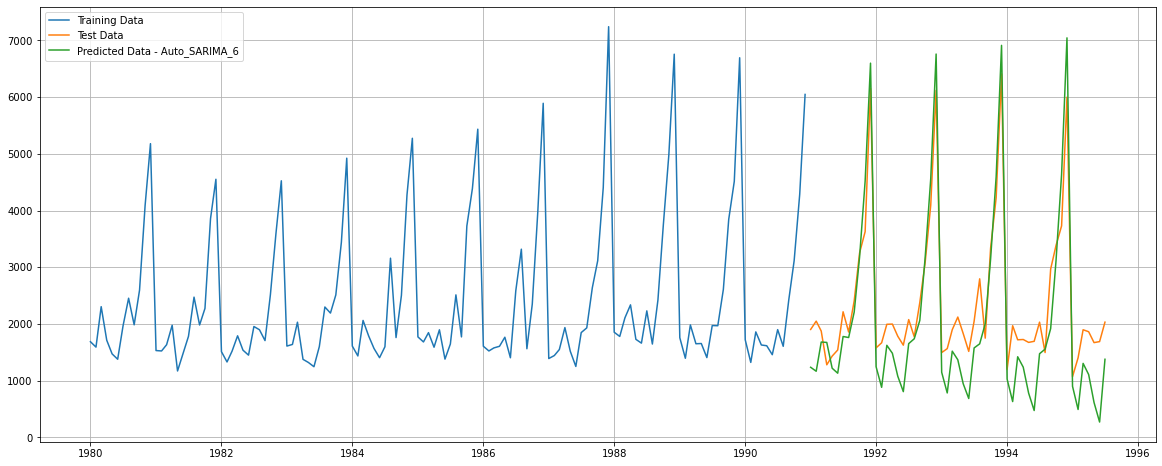

In [245]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_6.predicted_mean,label='Predicted Data - Auto_SARIMA_6')
plt.legend(loc='best')
plt.grid();

In [247]:
rmse_auto_SARIMA_6 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print('RMSE:',rmse_auto_SARIMA_6)


RMSE: 663.5344722675138


In [248]:
temp_resultsDf = pd.DataFrame({'Method': ['Auto_SARIMA_6(2,1,4)(4,0,4,6)'], 'RMSE': [rmse_auto_SARIMA_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0               LinearRegression  1389.135000
0                    Naive_model  3864.279352
0                 Simple Average  1275.081804
0          moving_avg_forecast_4  1156.590000
0          moving_avg_forecast_6  1283.927000
0          moving_avg_forecast_8  1342.568000
0         moving_avg_forecast_12  1267.925000
0                            SES  1316.035487
0            Holt's Linear Trend  2007.238526
0                    Holt_Winter   378.951023
0                Holt_Winter Mul   404.286809
0                 ARIMA(4, 1, 4)  1229.030437
0            AUTO_ARIMA(4, 1, 4)  1229.030437
0          Manual_ARIMA(4, 1, 4)  1299.979640
0  Auto_SARIMA_6(2,1,4)(4,0,4,6)   663.534472

#### Method 12: Auto SARIMA Model_12

In [250]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [252]:
SARIMA_AIC_12 = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_12

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [253]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC_12 = SARIMA_AIC_12.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616842675
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640236566
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.9905301389083
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735791705
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054158611443
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.9898053920801
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.768864956687
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.708957288972
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.090319373017
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.1319652484135
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245088165164
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.401882416

In [254]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
364  (2, 1, 4)  (2, 0, 4, 6)  1534.798431
114  (0, 1, 4)  (2, 0, 4, 6)  1535.344781
624  (4, 1, 4)  (4, 0, 4, 6)  1536.538349
489  (3, 1, 4)  (2, 0, 4, 6)   1536.61748
239  (1, 1, 4)  (2, 0, 4, 6)  1536.681702

In [256]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 4),
                                seasonal_order=(2, 0, 4, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(2, 1, 4)x(2, 0, 4, 6)   Log Likelihood                -754.399
Date:                           Fri, 23 Dec 2022   AIC                           1534.798
Time:                                   06:02:08   BIC                           1568.923
Sample:                                        0   HQIC                          1548.617
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6589      0.140    -11.855      0.000      -1.933      -1.385
ar.L2         -0.8478      0.120     -7.046

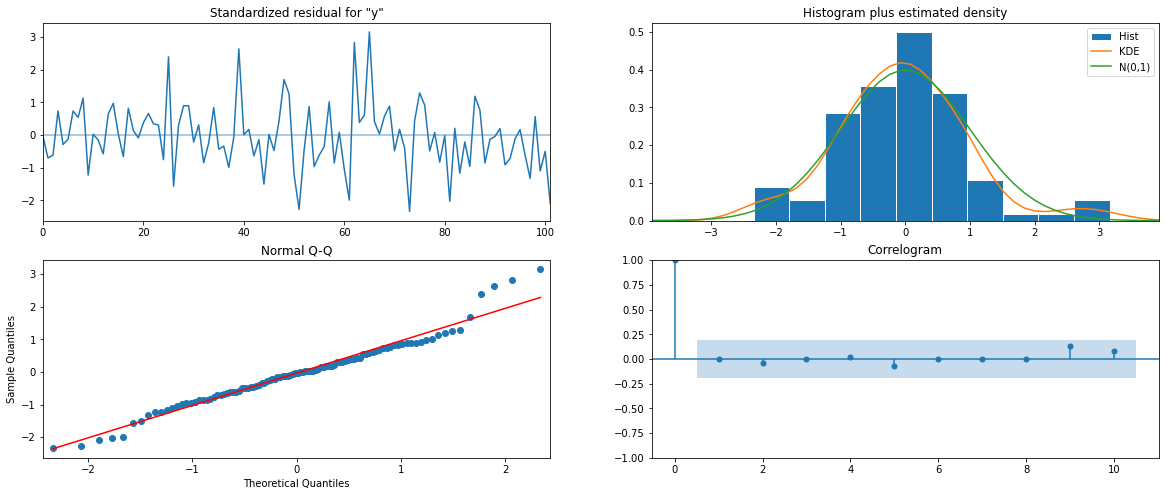

In [257]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

#### Predict on the Test Set using this model and evaluate the model.

In [258]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))

In [259]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1190.475213  377.791629     450.017227    1930.933199
1  1098.463875  393.051037     328.097998    1868.829751
2  1692.380643  392.911205     922.288833    2462.472453
3  1731.176264  399.893768     947.398881    2514.953647
4  1247.137305  399.878414     463.390015    2030.884594

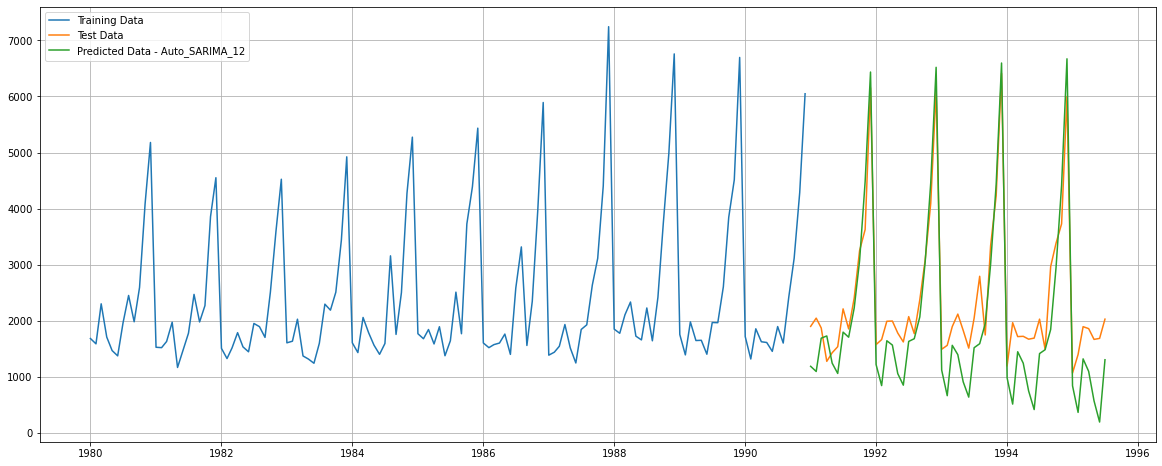

In [260]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_auto_SARIMA_12.predicted_mean,label='Predicted Data - Auto_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [261]:
rmse_auto_SARIMA_12 = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print('RMSE:',rmse_auto_SARIMA_12)

RMSE: 668.066331198882


In [262]:
temp_resultsDf = pd.DataFrame({'Method':['Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)'],'RMSE': [rmse_auto_SARIMA_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0                     LinearRegression  1389.135000
0                          Naive_model  3864.279352
0                       Simple Average  1275.081804
0                moving_avg_forecast_4  1156.590000
0                moving_avg_forecast_6  1283.927000
0                moving_avg_forecast_8  1342.568000
0               moving_avg_forecast_12  1267.925000
0                                  SES  1316.035487
0                  Holt's Linear Trend  2007.238526
0                          Holt_Winter   378.951023
0                      Holt_Winter Mul   404.286809
0                       ARIMA(4, 1, 4)  1229.030437
0                  AUTO_ARIMA(4, 1, 4)  1229.030437
0                Manual_ARIMA(4, 1, 4)  1299.979640
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)   663.534472
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)   668.066331

#### Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6

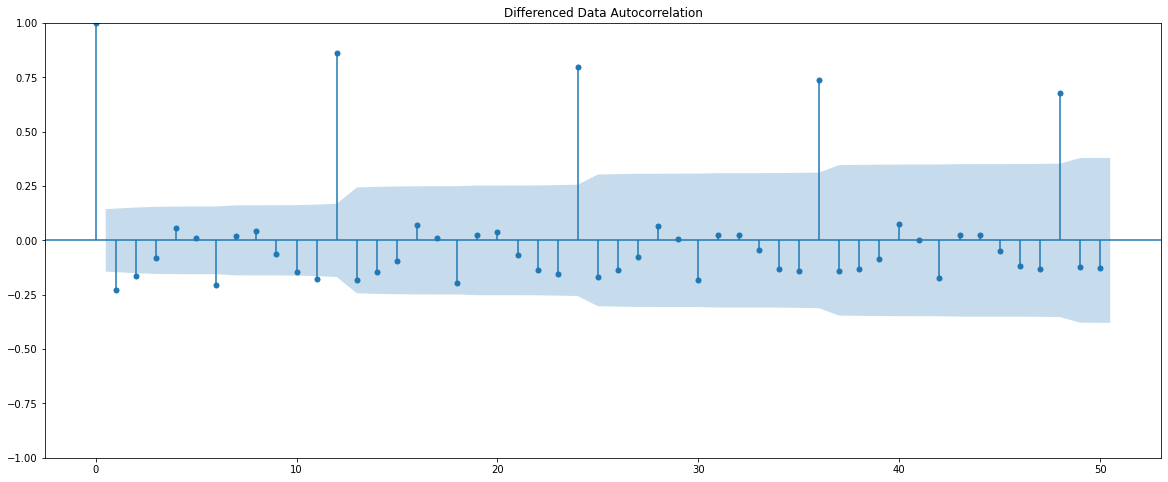

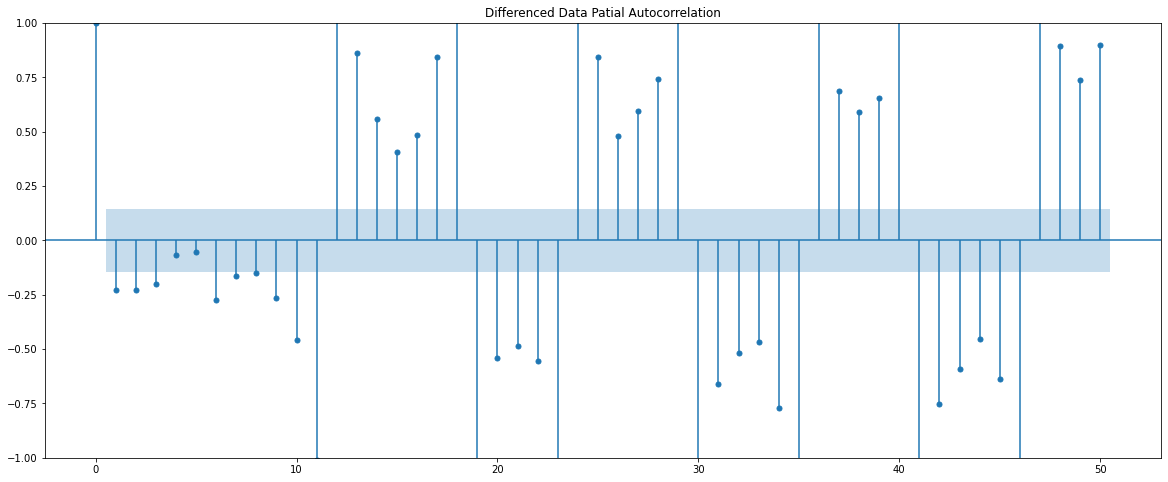

In [264]:
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

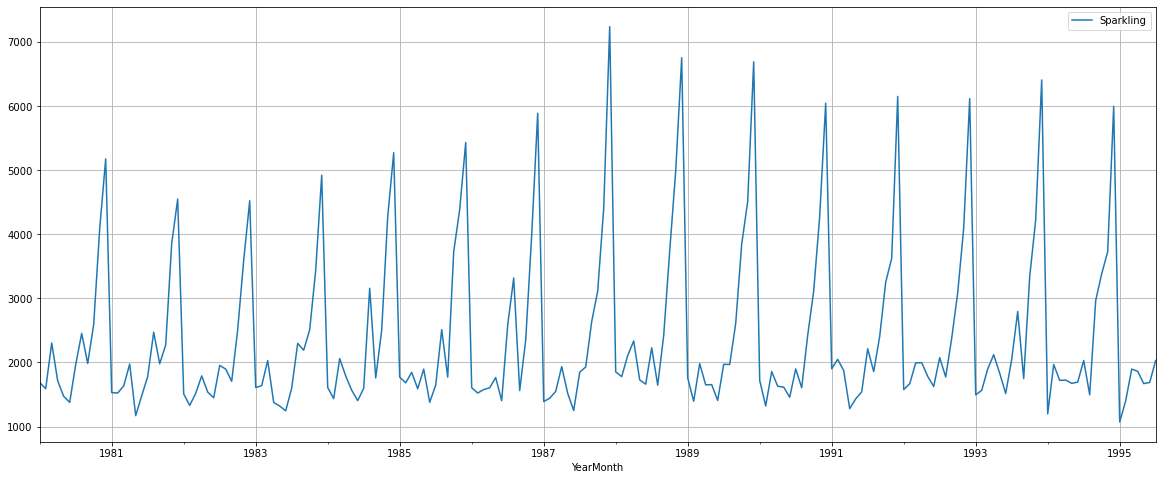

In [266]:
df_sparkling.plot()
plt.grid();

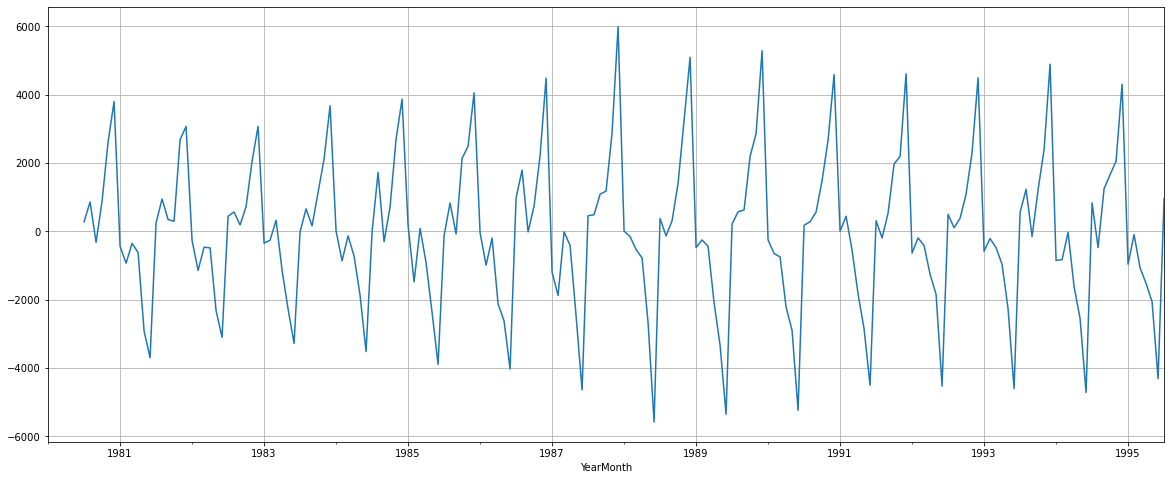

In [267]:
(df_sparkling['Sparkling'].diff(6)).plot()
plt.grid();

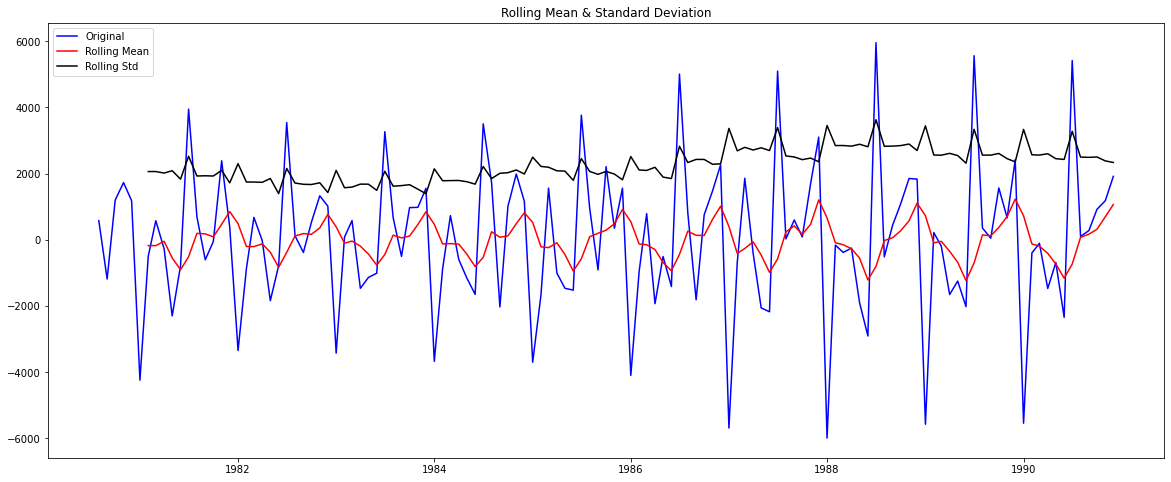

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [268]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots for the new modified Time Series.

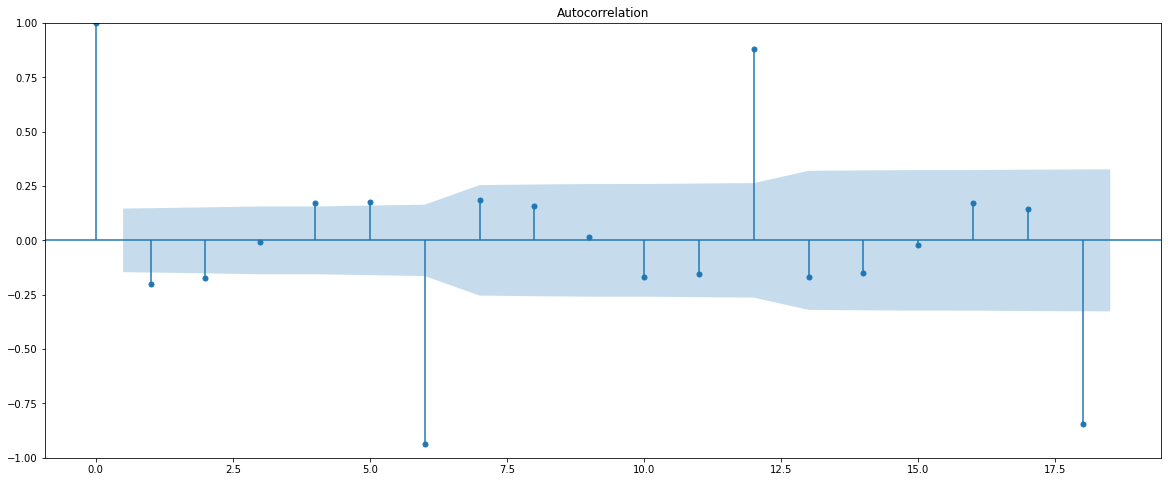

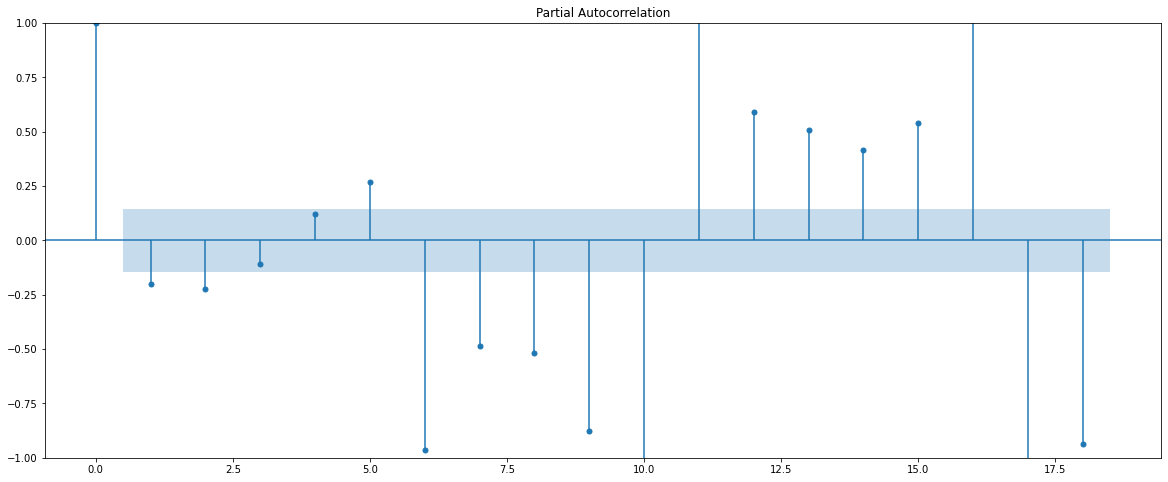

In [270]:
plot_acf((df_sparkling['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_sparkling['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=18);

In [273]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(2, 1,2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(2, 1, [1, 2], 6)   Log Likelihood                -821.646
Date:                                Fri, 23 Dec 2022   AIC                           1657.292
Time:                                        10:51:28   BIC                           1676.258
Sample:                                             0   HQIC                          1664.986
                                                - 132                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1336      0.116      1.151      0.250      -0.094       0.361
ma.

Predict on the Test Set using this model and evaluate the model.

In [274]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))

In [275]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1473.401518  392.922501     703.287567    2243.515469
1  1148.188792  401.647217     360.974712    1935.402872
2  1789.522040  403.829953     998.029876    2581.014204
3  1598.834391  405.467480     804.132733    2393.536049
4  1373.817190  407.033063     576.047046    2171.587334

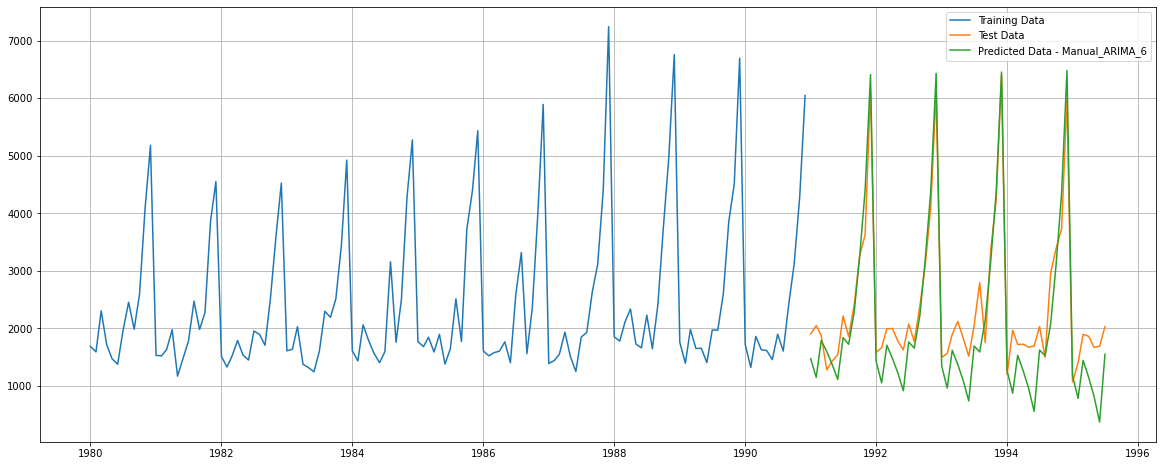

In [276]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_6.predicted_mean,label='Predicted Data - Manual_ARIMA_6')
plt.legend(loc='best')
plt.grid();

In [277]:
rmse_manual_6 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print('RMSE:',rmse_manual_6)

RMSE: 550.8964751079753


In [279]:
temp_resultsDf = pd.DataFrame({'Method':['Manual_SARIMA_6(3,1,1)(2,1,4,6)'],'RMSE': [rmse_manual_6]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0                     LinearRegression  1389.135000
0                          Naive_model  3864.279352
0                       Simple Average  1275.081804
0                moving_avg_forecast_4  1156.590000
0                moving_avg_forecast_6  1283.927000
0                moving_avg_forecast_8  1342.568000
0               moving_avg_forecast_12  1267.925000
0                                  SES  1316.035487
0                  Holt's Linear Trend  2007.238526
0                          Holt_Winter   378.951023
0                      Holt_Winter Mul   404.286809
0                       ARIMA(4, 1, 4)  1229.030437
0                  AUTO_ARIMA(4, 1, 4)  1229.030437
0                Manual_ARIMA(4, 1, 4)  1299.979640
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)   663.534472
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)   668.066331
0      Manual_SARIMA_6(3,1,1)(2,1,4,6)   550.896475

Manual SARIMA model_12

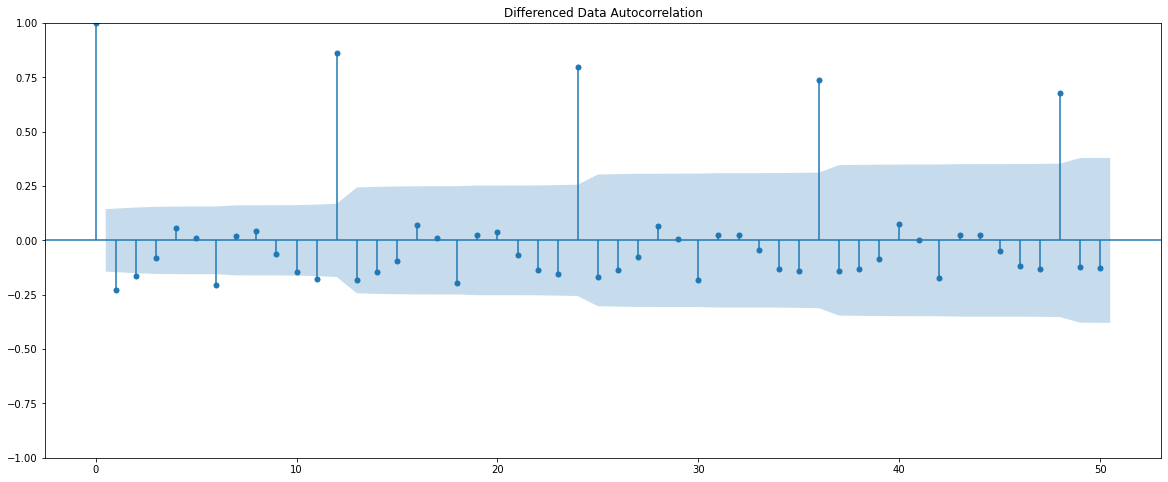

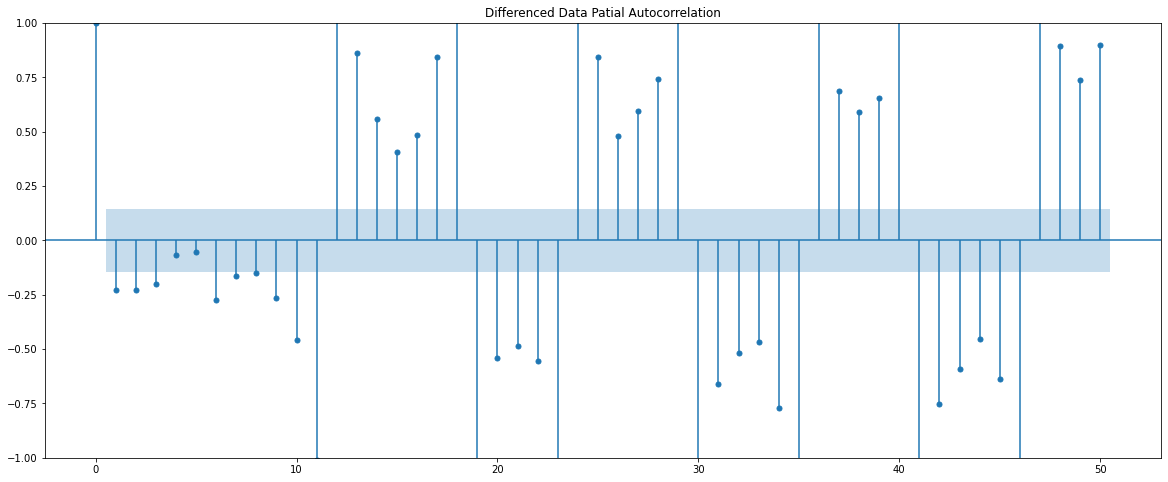

In [280]:
plot_acf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df_sparkling['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

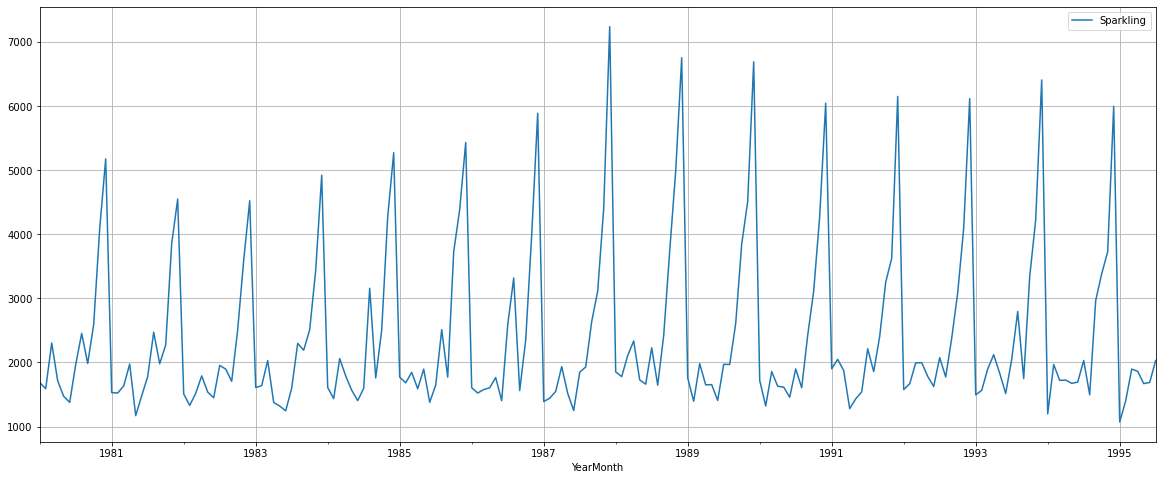

In [281]:
df_sparkling.plot()
plt.grid();

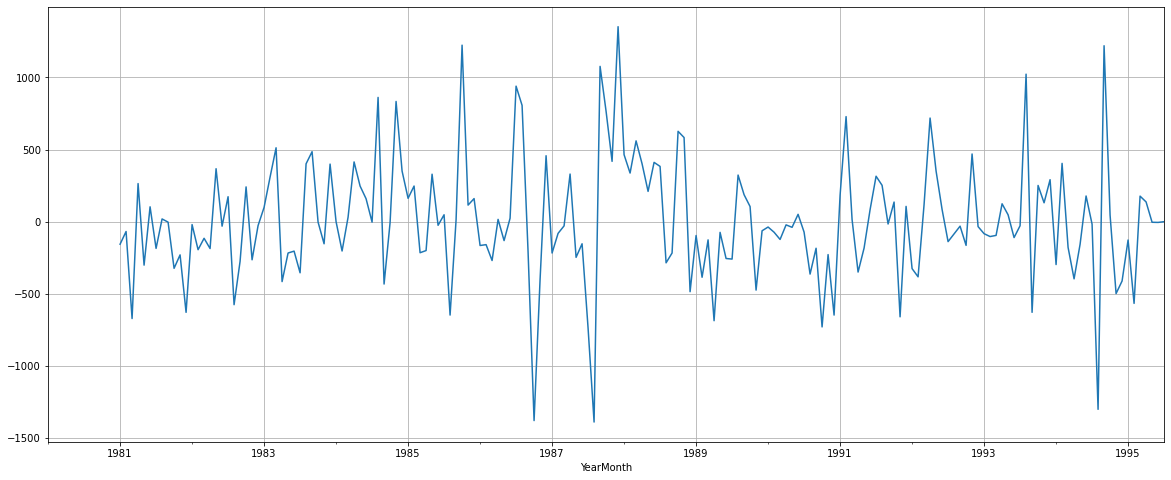

In [283]:
(df_sparkling['Sparkling'].diff(12)).plot()
plt.grid();

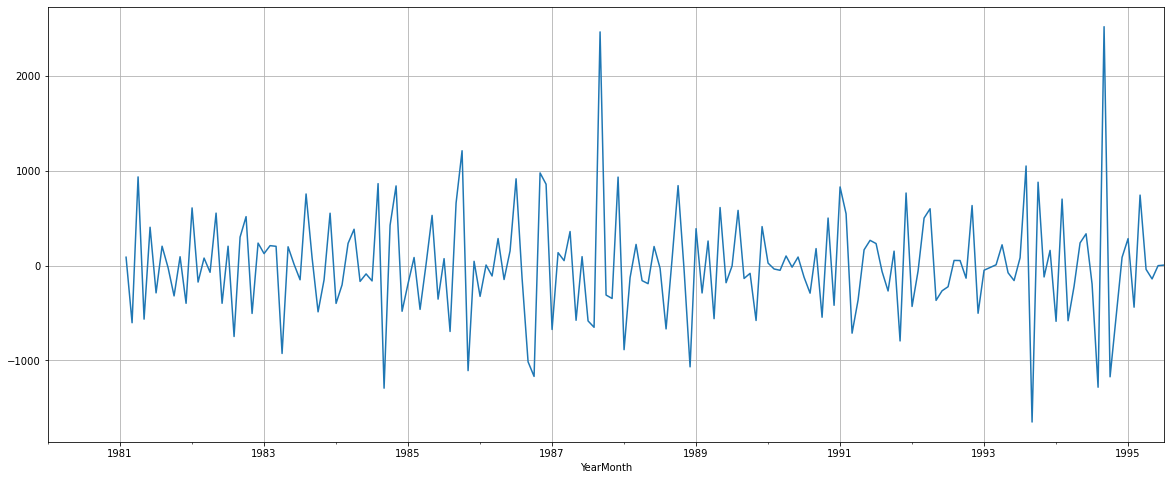

In [284]:
(df_sparkling['Sparkling'].diff(12)).diff().plot()
plt.grid();

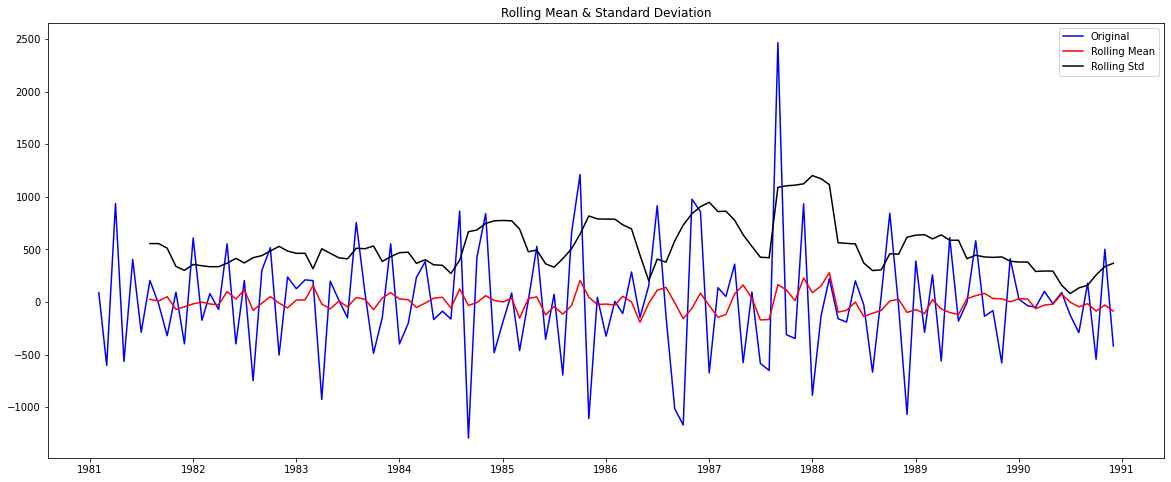

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [285]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

Checking ACF and PACF plots

In [ ]:
plot_acf((df_imputed['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18)
plot_pacf((df_imputed['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=18);

In [286]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(2, 1, 2),
                                seasonal_order=(4, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_12.fit(maxiter=1000)
print(results_manual_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(2, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -514.651
Date:                            Fri, 23 Dec 2022   AIC                           1051.301
Time:                                    11:08:14   BIC                           1075.876
Sample:                                         0   HQIC                          1061.051
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5133      0.269     -1.911      0.056      -1.040       0.013
ar.L2          0.0377      0.195   

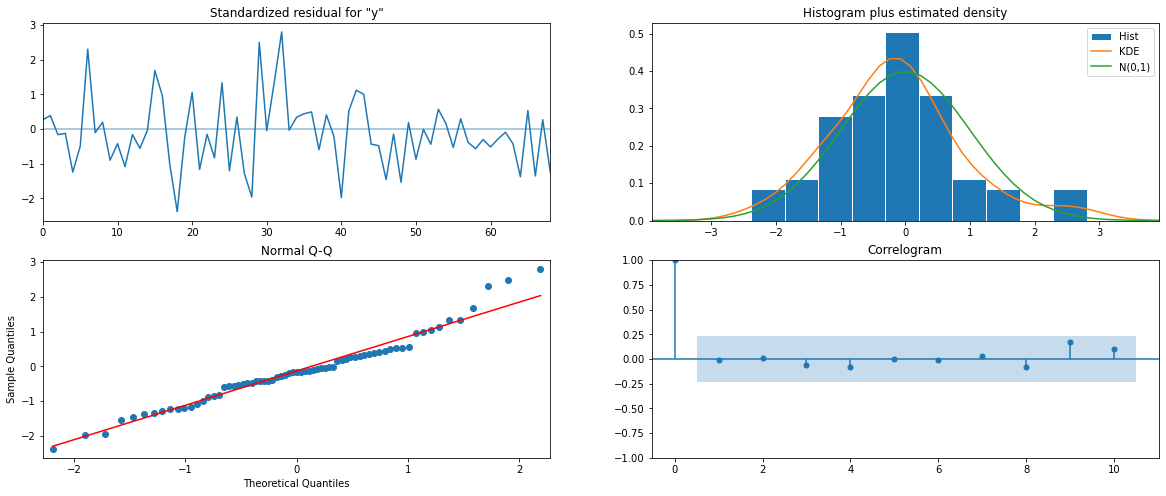

In [287]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model and evaluate the model

In [288]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))

In [289]:
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1452.535647  389.583226     688.966555    2216.104739
1  1508.880307  419.410371     686.851084    2330.909529
2  1797.243323  419.407548     975.219634    2619.267013
3  1626.029958  424.380784     794.258905    2457.801011
4  1544.387116  424.679746     712.030109    2376.744123

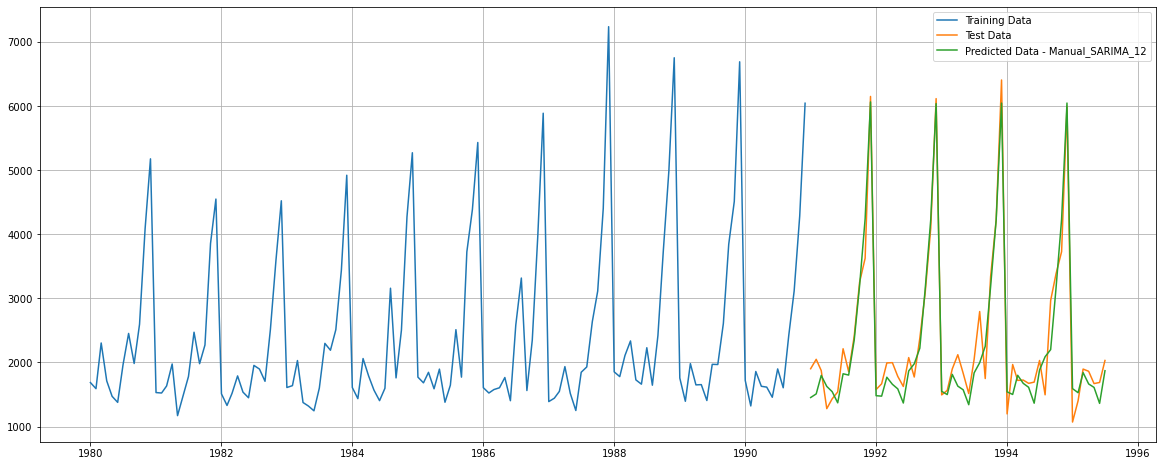

In [290]:
plt.plot(train['Sparkling'],label='Training Data')
plt.plot(test['Sparkling'],label='Test Data')
plt.plot(test.index,predicted_manual_SARIMA_12.predicted_mean,label='Predicted Data - Manual_SARIMA_12')
plt.legend(loc='best')
plt.grid();

In [294]:
rmse_manual_sarima_12 = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print('RMSE:',rmse_manual_sarima_12)


RMSE: 310.5861036241977


### 8. Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [295]:
temp_resultsDf = pd.DataFrame({'Method': ['Manual_SARIMA_12(2,1,2)(4,1,2,12)'],'RMSE': [rmse_manual_sarima_12]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0                     LinearRegression  1389.135000
0                          Naive_model  3864.279352
0                       Simple Average  1275.081804
0                moving_avg_forecast_4  1156.590000
0                moving_avg_forecast_6  1283.927000
0                moving_avg_forecast_8  1342.568000
0               moving_avg_forecast_12  1267.925000
0                                  SES  1316.035487
0                  Holt's Linear Trend  2007.238526
0                          Holt_Winter   378.951023
0                      Holt_Winter Mul   404.286809
0                       ARIMA(4, 1, 4)  1229.030437
0                  AUTO_ARIMA(4, 1, 4)  1229.030437
0                Manual_ARIMA(4, 1, 4)  1299.979640
0        Auto_SARIMA_6(2,1,4)(4,0,4,6)   663.534472
0  Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)   668.066331
0      Manual_SARIMA_6(3,1,1)(2,1,4,6)   550.896475
0    Manual_SARIMA_12(2,1,2)(4,1,2,12)   310.586104

### Building the most optimum model on the Full Data

### 9. Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

In [298]:
full_data_model = sm.tsa.statespace.SARIMAX(df_sparkling['Sparkling'],
                                order=(2,1,2),
                                seasonal_order=(6, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Sparkling   No. Observations:                  187
Model:             SARIMAX(2, 1, 2)x(6, 1, [1], 12)   Log Likelihood                -735.450
Date:                              Fri, 23 Dec 2022   AIC                           1494.900
Time:                                      17:38:19   BIC                           1526.162
Sample:                                  01-01-1980   HQIC                          1507.552
                                       - 07-01-1995                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8517      0.125     -6.816      0.000      -1.097      -0.607
ar.L2          0.05

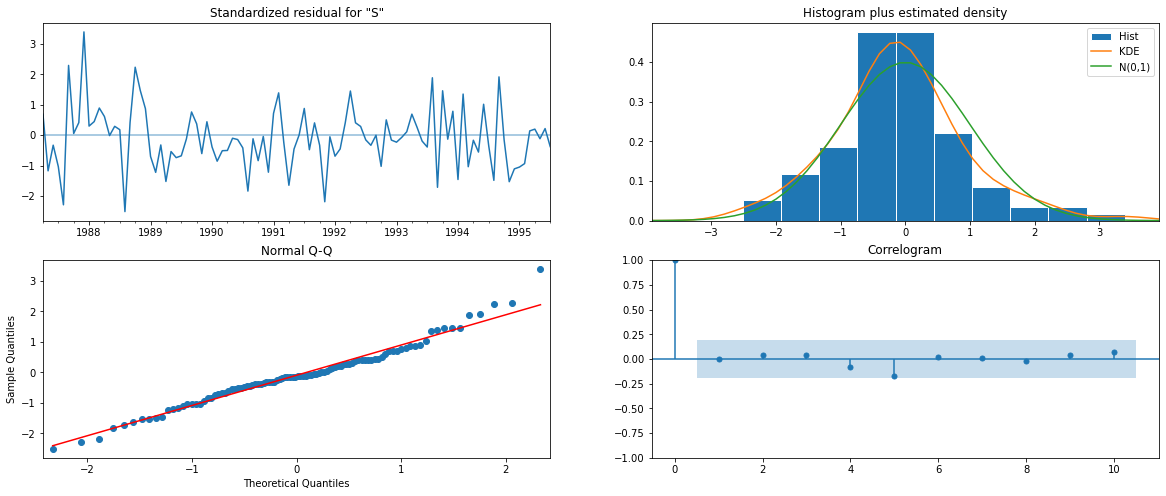

In [299]:
results_full_data_model.plot_diagnostics();

#### Evaluate the model on the whole and predict 12 months into the future (till the end of next year).

In [300]:
predicted_manual_SARIMA_12_full_data = results_full_data_model.get_forecast(steps=12)

In [301]:
predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).head(12)

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-01  1666.018189  373.935625     933.117831    2398.918548
1995-09-01  2581.737766  380.181633    1836.595458    3326.880075
1995-10-01  3265.035612  380.194151    2519.868769    4010.202456
1995-11-01  4005.969416  382.265607    3256.742594    4755.196238
1995-12-01  6005.797521  382.263639    5256.574557    6755.020485
1996-01-01  1222.166490  383.973068     469.593105    1974.739876
1996-02-01  1364.626675  383.971678     612.056015    2117.197334
1996-03-01  1839.811786  385.407859    1084.426263    2595.197309
1996-04-01  1716.978763  385.426396     961.556909    2472.400618
1996-05-01  1644.885151  386.655849     887.053613    2402.716689
1996-06-01  1503.660616  386.704803     745.733130    2261.588101
1996-07-01  1915.843593  387.773142    1155.822201    2675.864986

In [303]:
rmse_full_data = mean_squared_error(df_sparkling['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse_full_data)

RMSE of the Full Model 619.0027147066997


In [304]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_12_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-01',end='1996-08-01', freq='M'))

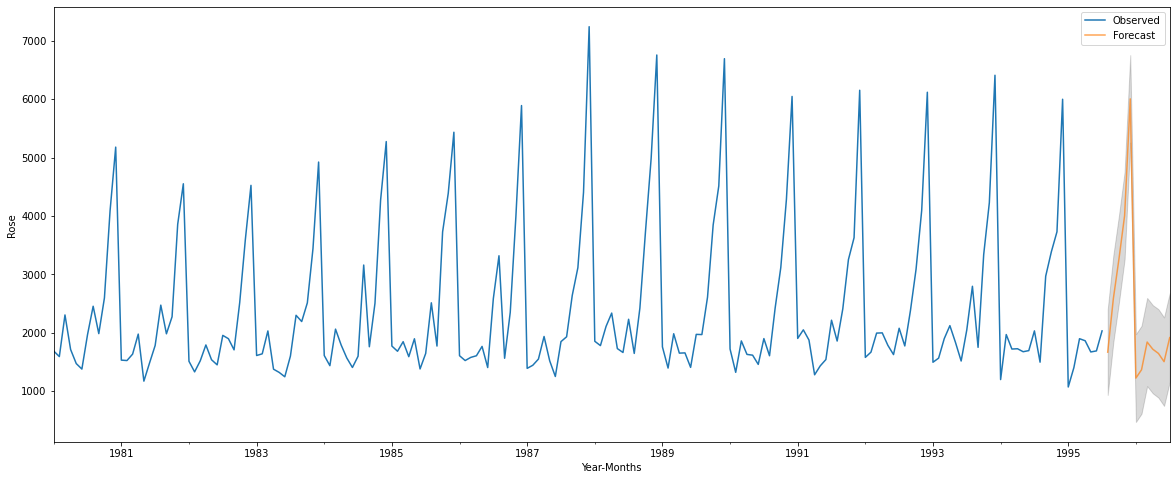

In [306]:
# plot the forecast along with the confidence band

axis = df_sparkling['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.show()

In [307]:
temp_resultsDf = pd.DataFrame({'Method':['Fulldata_Manual_SARIMA(2,1,2)(6,1,1,12)'],'RMSE': [rmse_full_data]})
resultsDf = pd.concat([resultsDf,temp_resultsDf])
resultsDf

Method         RMSE
0                         LinearRegression  1389.135000
0                              Naive_model  3864.279352
0                           Simple Average  1275.081804
0                    moving_avg_forecast_4  1156.590000
0                    moving_avg_forecast_6  1283.927000
0                    moving_avg_forecast_8  1342.568000
0                   moving_avg_forecast_12  1267.925000
0                                      SES  1316.035487
0                      Holt's Linear Trend  2007.238526
0                              Holt_Winter   378.951023
0                          Holt_Winter Mul   404.286809
0                           ARIMA(4, 1, 4)  1229.030437
0                      AUTO_ARIMA(4, 1, 4)  1229.030437
0                    Manual_ARIMA(4, 1, 4)  1299.979640
0            Auto_SARIMA_6(2,1,4)(4,0,4,6)   663.534472
0      Auto_SARIMA_12(2, 1, 4)(2, 0, 4, 6)   668.066331
0          Manual_SARIMA_6(3,1,1)(2,1,4,6)   550.896475
0        Manual_SARIMA_12(2,1,2)(4,1,2,12)   310.586104
0  Fulldata_Manual_SARIMA(2,1,2)(6,1,1,12)   619.002715